# How Diverse is TIME'S 100 Most Influential People List?

Each year, beginning in 1999 (and digitally from 2004), TIMES Magazine releases a list of the 100 most influential people in the world for that year. Chosen exclusively by Time's editors after nominations from alumnae and international staff, the list features people who are "recognized for changing the world, regardless of the consequences of their actions."

Appearing on this list is generally considered an honor, and has thus generated controversy over whom it includes as well as excludes. While the list is presented as a _reflection_ of the current state of the world, the editorial decisions behind it are telling of the power structures that shape our worldviews. 

I will be scraping Time's 100 Most Influential People List from the years 2004, 2007, 2010, 2013, 2015, 2017, 2019 and 2020 and analyze it for changing trends in nationality, gender, age and "category" of influence. 

# 1. Getting the raw data

Time has different formats and graphics on each of their lists, and unfortunately none of them are very consistent. 

For instance, the most recent [list from 2020](https://time.com/collection/100-most-influential-people-2020/) features a beautiful visual design with videos, photographs and interactive buttons. The [list from 2017](https://time.com/collection/2017-time-100/) has an entirely different layout and organization structure, as does the [2015 list](https://time.com/collection/2015-time-100/). And everthing before [2013](https://time100.time.com/2013/04/18/time-100/slide/all/) is archived in yet another format. 

And all of these different designs means dramatically different div trees and tags!

I tried to loop through these URLs while using both BeautifulSoup and Selenium, but found lots of errors and inconsistencies because the differently structured data. It was easier to go through each URL one at a time, troubleshoot, and then copy the functioning code to extract the necessary info.

In [1]:
import requests
from bs4 import BeautifulSoup
from selenium import webdriver
import pandas as pd
pd.set_option("display.max_rows", 500)
pd.set_option('max_colwidth', 400)
import re
import numpy as np

/Users/paromasoni/.pyenv/versions/3.8.2/lib/python3.8/site-packages/pandas/compat/__init__.py:120: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


(I actually did each of these in separate Notebooks, but compiling them here for clarity.)

## Time 2020 
The most recent, and therefore most interactive and graphic-heavy list. Using BeautifulSoup for this made it a lot easier to understand the div-tree, because most (if not all) the links were hover boxes (without their own URLs), making it hard to use Selenium and inspect the page accurately.

In [2]:
response = requests.get("https://time.com/collection/100-most-influential-people-2020/")
doc = BeautifulSoup(response.content, "html.parser")
doc.prettify()

'<!DOCTYPE html>\n<!--\n:////////////////////////: ..-////-..        .//`                 :/-        ..-///////////////////-\n-`````````.////.`````````:   `////.          -///                -///           ////-`````````````.-\n-         .////.         -   `////.          ////:              .////`          ////-              -\n          .////.             `////.         `/////-            `/////-          ////-\n          .////.             `////.         ://////.          `///////          ////-\n          .////.             `////.         //..////.         :/:-////.         ////-           `.\n          .////.             `////.        .//` :////.       :/: `////:         ////:..........:-\n          .////.             `////.        //:   :////`     -/:`  -////`        ////:...........:-\n          .////.             `////.       `//`    :////`   -//`   `////-        ////-           `.\n          .////.             `////.       ://     `/////` -//`     :////        ////-\n          

In [3]:
full = doc.find_all('a')
allnames2020 = []
count = 0
for each in full[56:158]:
    names = each('span')
    names = (names[0].text.strip())
    links = (each['href'])
    if names == 'LASTESIS':
        names = 'Las Tesis'
    if names == names.upper():
        category = names
        #print (category)
        count = count + 1
    if count == 1 and names != category:
        eachnamedict = {'Name': names,
                       'Category': category,
                       'Year': '2020',
                       'Link': links}
        allnames2020.append(eachnamedict)
    if count == 2 and names != category:
        eachnamedict = {'Name': names,
                       'Category': category,
                       'Year': '2020',
                       'Link': links}
        allnames2020.append(eachnamedict)
    if count == 3 and names != category:
        eachnamedict = {'Name': names,
                       'Category': category,
                       'Year': '2020',
                       'Link': links}
        allnames2020.append(eachnamedict)
    if count == 4 and names != category:
        eachnamedict = {'Name': names,
                       'Category': category,
                       'Year': '2020',
                       'Link': links}
        allnames2020.append(eachnamedict)
    if count == 5 and names != category:
        eachnamedict = {'Name': names,
                       'Category': category,
                       'Year': '2020',
                       'Link': links}
        allnames2020.append(eachnamedict)
    if count == 6 and names != category:
        eachnamedict = {'Name': names,
                       'Category': category,
                       'Year': '2020',
                       'Link': links}
        allnames2020.append(eachnamedict)
print (len(allnames2020))
allnames2020

97


[{'Name': 'Megan Thee Stallion',
  'Category': 'PIONEERS',
  'Year': '2020',
  'Link': 'https://time.com/collection/100-most-influential-people-2020/5888165/megan-thee-stallion-pioneer/'},
 {'Name': 'Giannis Antetokounmpo',
  'Category': 'PIONEERS',
  'Year': '2020',
  'Link': 'https://time.com/collection/100-most-influential-people-2020/5888173/giannis-antetokounmpo/'},
 {'Name': 'Ibram X. Kendi',
  'Category': 'PIONEERS',
  'Year': '2020',
  'Link': 'https://time.com/collection/100-most-influential-people-2020/5888207/ibram-x-kendi/'},
 {'Name': 'Nathan Law',
  'Category': 'PIONEERS',
  'Year': '2020',
  'Link': 'https://time.com/collection/100-most-influential-people-2020/5888201/nathan-law/'},
 {'Name': 'Tomi Adeyemi',
  'Category': 'PIONEERS',
  'Year': '2020',
  'Link': 'https://time.com/collection/100-most-influential-people-2020/5888211/tomi-adeyemi/'},
 {'Name': 'Astronauts Christina Koch and Jessica Meir',
  'Category': 'PIONEERS',
  'Year': '2020',
  'Link': 'https://time.co

In [4]:
df20 = pd.DataFrame(allnames2020)

df20

Name  \
0                                                          Megan Thee Stallion   
1                                                        Giannis Antetokounmpo   
2                                                               Ibram X. Kendi   
3                                                                   Nathan Law   
4                                                                 Tomi Adeyemi   
5                                   Astronauts Christina Koch and Jessica Meir   
6                                                               Julie K. Brown   
7                                                             Cecilia Martinez   
8                                                                   Maya Moore   
9                                                               Chase Strangio   
10                                                              Zhang Yongzhen   
11                                                                  Tourmaline   
12                                                              Waad al-Kateab   
13                                                          Abubacarr Tambadou   
14                                                             Gabriela Cámara   
15                                                               Camilla Rothe   
16                                                            Rebecca Gomperts   
17                                                              Ravindra Gupta   
18                                                              Lauren Gardner   
19                                                                 Shi Zhengli   
20                                                                  Shiori Ito   
21                                                                  The Weeknd   
22                                                                    Ali Wong   
23                                                           Michael B. Jordan   
24                                                                Selena Gomez   
25                                                                    J Balvin   
26                                                                   JoJo Siwa   
27                                                                      Halsey   
28                                                        Phoebe Waller-Bridge   
29                                                             Jennifer Hudson   
30                                                                    Yo-Yo Ma   
31                                                                  Dapper Dan   
32                                                              Anaïs Mitchell   
33                                                               Michaela Coel   
34                                                                Bong Joon Ho   
35                                                                   Las Tesis   
36                                                               Julie Mehretu   
37                                                          Ayushmann Khurrana   
38                                                               Anthony Fauci   
39                                                               Kamala Harris   
40                                                                Tsai Ing-wen   
41                                                                John Roberts   
42                                                                  Xi Jinping   
43                                                                Donald Trump   
44                                                                      Caesar   
45                                                               Angela Merkel   
46                                                                   Joe Biden   
47                                                              Jair Bolsonaro   
48                                                      

This dataframe gives me each person's **name**, the **category** for which they are selected, a **link to the blurb** about them, and the **year** of the list (for when I eventually combine all the dataframes).

#### Some manual cleaning:
There were many little errors, especially when multiple names were grouped together into one row. I manually entered some code to clean through them, first by adding in rows for the second/third person in the grouped row, and then renaming the original row to only the first person:

In [5]:
cleaning = [
            {'Name': 'Jessica Meir',
            'Category': 'PIONEERS',
            'Year': '2020',
            'Link': 'https://time.com/collection/100-most-influential-people-2020/5888216/all-women-spacewalk-christina-koch-jessica-meir/'},
             {'Name': ' Patrisse Cullors',
            'Category': 'ICONS',
            'Year': '2020',
            'Link': 'https://time.com/collection/100-most-influential-people-2020/5888228/black-lives-matter-founders/'},
            {'Name': ' Opal Tometi',
            'Category': 'ICONS',
            'Year': '2020',
            'Link':'https://time.com/collection/100-most-influential-people-2020/5888228/black-lives-matter-founders/'}
            ]

df20 = df20.append(cleaning, ignore_index=True)


In [6]:
df20.Name[df20.Name == 'Astronauts Christina Koch and Jessica Meir'] = df20.Name[df20.Name == 'Astronauts Christina Koch and Jessica Meir'].str.replace('Astronauts Christina Koch and Jessica Meir', 'Christina Koch')
df20.Name[df20.Name == 'Black Lives Matter Founders Alicia Garza, Patrisse Cullors and Opal Tometi'] = df20.Name[df20.Name == 'Black Lives Matter Founders Alicia Garza, Patrisse Cullors and Opal Tometi'].str.replace('Black Lives Matter Founders Alicia Garza, Patrisse Cullors and Opal Tometi', 'Alicia Garza')

df20

Name  Category  Year  \
0           Megan Thee Stallion  PIONEERS  2020   
1         Giannis Antetokounmpo  PIONEERS  2020   
2                Ibram X. Kendi  PIONEERS  2020   
3                    Nathan Law  PIONEERS  2020   
4                  Tomi Adeyemi  PIONEERS  2020   
5                Christina Koch  PIONEERS  2020   
6                Julie K. Brown  PIONEERS  2020   
7              Cecilia Martinez  PIONEERS  2020   
8                    Maya Moore  PIONEERS  2020   
9                Chase Strangio  PIONEERS  2020   
10               Zhang Yongzhen  PIONEERS  2020   
11                   Tourmaline  PIONEERS  2020   
12               Waad al-Kateab  PIONEERS  2020   
13           Abubacarr Tambadou  PIONEERS  2020   
14              Gabriela Cámara  PIONEERS  2020   
15                Camilla Rothe  PIONEERS  2020   
16             Rebecca Gomperts  PIONEERS  2020   
17               Ravindra Gupta  PIONEERS  2020   
18               Lauren Gardner  PIONEERS  2020   
19                  Shi Zhengli  PIONEERS  2020   
20                   Shiori Ito  PIONEERS  2020   
21                   The Weeknd   ARTISTS  2020   
22                     Ali Wong   ARTISTS  2020   
23            Michael B. Jordan   ARTISTS  2020   
24                 Selena Gomez   ARTISTS  2020   
25                     J Balvin   ARTISTS  2020   
26                    JoJo Siwa   ARTISTS  2020   
27                       Halsey   ARTISTS  2020   
28         Phoebe Waller-Bridge   ARTISTS  2020   
29              Jennifer Hudson   ARTISTS  2020   
30                     Yo-Yo Ma   ARTISTS  2020   
31                   Dapper Dan   ARTISTS  2020   
32               Anaïs Mitchell   ARTISTS  2020   
33                Michaela Coel   ARTISTS  2020   
34                 Bong Joon Ho   ARTISTS  2020   
35                    Las Tesis   ARTISTS  2020   
36                Julie Mehretu   ARTISTS  2020   
37           Ayushmann Khurrana   ARTISTS  2020   
38                Anthony Fauci   LEADERS  2020   
39                Kamala Harris   LEADERS  2020   
40                 Tsai Ing-wen   LEADERS  2020   
41                 John Roberts   LEADERS  2020   
42                   Xi Jinping   LEADERS  2020   
43                 Donald Trump   LEADERS  2020   
44                       Caesar   LEADERS  2020   
45                Angela Merkel   LEADERS  2020   
46                    Joe Biden   LEADERS  2020   
47               Jair Bolsonaro   LEADERS  2020   
48                 Nancy Pelosi   LEADERS  2020   
49                Narendra Modi   LEADERS  2020   
50                 William Barr   LEADERS  2020   
51                 Anne Hidalgo   LEADERS  2020   
52   Tedros Adhanom Ghebreyesus   LEADERS  2020   
53               Mary Kay Henry   LEADERS  2020   
54             Nemonte Nenquimo   LEADERS  2020   
55         Ursula von der Leyen   LEADERS  2020   
56              Jung Eun-kyeong   LEADERS  2020   
57              Bonnie Castillo   LEADERS  2020   
58  Jean-Jacques Muyembe Tamfum   LEADERS  2020   
59             Yousef Al Otaiba   LEADERS  2020   
60              Gabrielle Union    TITANS  2020   
61                  Dwyane Wade    TITANS  2020   
62                Sundar Pichai    TITANS  2020   
63                  Tyler Perry    TITANS  2020   
64              MacKenzie Scott    TITANS  2020   
65              Robert F. Smith    TITANS  2020   
66               Lewis Hamilton    TITANS  2020   
67                Jerome Powell    TITANS  2020   
68                    Eric Yuan    TITANS  2020   
69              Patrick Mahomes    TITANS  2020   
70    Claire Babineaux-Fontenot    TITANS  2020   
71                Greg Berlanti    TITANS  2020   
72               Shari Redstone    TITANS  2020   
73                 Tony Elumelu    TITANS  2020   
74                Zhong Nanshan    TITANS  2020   
75         Kristalina Georgieva    TITANS  2020   
76               Lisa Nishimura    TITANS  2020   
77  General Charles Q. Brown Jr    TITANS  2020  

Saving it to a CSV for good measure.

In [7]:
df20.to_csv('2020_Times_Scraped_List.csv',sep=',',index=False)
df20

Name  Category  Year  \
0           Megan Thee Stallion  PIONEERS  2020   
1         Giannis Antetokounmpo  PIONEERS  2020   
2                Ibram X. Kendi  PIONEERS  2020   
3                    Nathan Law  PIONEERS  2020   
4                  Tomi Adeyemi  PIONEERS  2020   
5                Christina Koch  PIONEERS  2020   
6                Julie K. Brown  PIONEERS  2020   
7              Cecilia Martinez  PIONEERS  2020   
8                    Maya Moore  PIONEERS  2020   
9                Chase Strangio  PIONEERS  2020   
10               Zhang Yongzhen  PIONEERS  2020   
11                   Tourmaline  PIONEERS  2020   
12               Waad al-Kateab  PIONEERS  2020   
13           Abubacarr Tambadou  PIONEERS  2020   
14              Gabriela Cámara  PIONEERS  2020   
15                Camilla Rothe  PIONEERS  2020   
16             Rebecca Gomperts  PIONEERS  2020   
17               Ravindra Gupta  PIONEERS  2020   
18               Lauren Gardner  PIONEERS  2020   
19                  Shi Zhengli  PIONEERS  2020   
20                   Shiori Ito  PIONEERS  2020   
21                   The Weeknd   ARTISTS  2020   
22                     Ali Wong   ARTISTS  2020   
23            Michael B. Jordan   ARTISTS  2020   
24                 Selena Gomez   ARTISTS  2020   
25                     J Balvin   ARTISTS  2020   
26                    JoJo Siwa   ARTISTS  2020   
27                       Halsey   ARTISTS  2020   
28         Phoebe Waller-Bridge   ARTISTS  2020   
29              Jennifer Hudson   ARTISTS  2020   
30                     Yo-Yo Ma   ARTISTS  2020   
31                   Dapper Dan   ARTISTS  2020   
32               Anaïs Mitchell   ARTISTS  2020   
33                Michaela Coel   ARTISTS  2020   
34                 Bong Joon Ho   ARTISTS  2020   
35                    Las Tesis   ARTISTS  2020   
36                Julie Mehretu   ARTISTS  2020   
37           Ayushmann Khurrana   ARTISTS  2020   
38                Anthony Fauci   LEADERS  2020   
39                Kamala Harris   LEADERS  2020   
40                 Tsai Ing-wen   LEADERS  2020   
41                 John Roberts   LEADERS  2020   
42                   Xi Jinping   LEADERS  2020   
43                 Donald Trump   LEADERS  2020   
44                       Caesar   LEADERS  2020   
45                Angela Merkel   LEADERS  2020   
46                    Joe Biden   LEADERS  2020   
47               Jair Bolsonaro   LEADERS  2020   
48                 Nancy Pelosi   LEADERS  2020   
49                Narendra Modi   LEADERS  2020   
50                 William Barr   LEADERS  2020   
51                 Anne Hidalgo   LEADERS  2020   
52   Tedros Adhanom Ghebreyesus   LEADERS  2020   
53               Mary Kay Henry   LEADERS  2020   
54             Nemonte Nenquimo   LEADERS  2020   
55         Ursula von der Leyen   LEADERS  2020   
56              Jung Eun-kyeong   LEADERS  2020   
57              Bonnie Castillo   LEADERS  2020   
58  Jean-Jacques Muyembe Tamfum   LEADERS  2020   
59             Yousef Al Otaiba   LEADERS  2020   
60              Gabrielle Union    TITANS  2020   
61                  Dwyane Wade    TITANS  2020   
62                Sundar Pichai    TITANS  2020   
63                  Tyler Perry    TITANS  2020   
64              MacKenzie Scott    TITANS  2020   
65              Robert F. Smith    TITANS  2020   
66               Lewis Hamilton    TITANS  2020   
67                Jerome Powell    TITANS  2020   
68                    Eric Yuan    TITANS  2020   
69              Patrick Mahomes    TITANS  2020   
70    Claire Babineaux-Fontenot    TITANS  2020   
71                Greg Berlanti    TITANS  2020   
72               Shari Redstone    TITANS  2020   
73                 Tony Elumelu    TITANS  2020   
74                Zhong Nanshan    TITANS  2020   
75         Kristalina Georgieva    TITANS  2020   
76               Lisa Nishimura    TITANS  2020   
77  General Charles Q. Brown Jr    TITANS  2020  

#### But wait! 
It turns out that Time's website actually has no demographic data whatsoever about any of the 100 people in any of the 16 or so years they have been publishing it! Sometimes it makes sense – you wouldn't necessarily write a super famous person's gender on a list honoring their life's work. 


So to add basic information about each person, I then extracted their names and reformatted it into a Google search query, which I subsequently looped through using Selenium.

In [8]:
urlnames2020 = []
for eachname in df20.Name:
        eachname = eachname.replace(" ","+")
        if eachname == 'Tourmaline':
            eachname = eachname.replace('Tourmaline', 'Tourmaline+filmmaker')
        urlnames2020.append(f"https://www.google.com/search?q={eachname}")
        
urlnames2020

['https://www.google.com/search?q=Megan+Thee+Stallion',
 'https://www.google.com/search?q=Giannis+Antetokounmpo',
 'https://www.google.com/search?q=Ibram+X.+Kendi',
 'https://www.google.com/search?q=Nathan+Law',
 'https://www.google.com/search?q=Tomi+Adeyemi',
 'https://www.google.com/search?q=Christina+Koch',
 'https://www.google.com/search?q=Julie+K.+Brown',
 'https://www.google.com/search?q=Cecilia+Martinez',
 'https://www.google.com/search?q=Maya+Moore',
 'https://www.google.com/search?q=Chase+Strangio',
 'https://www.google.com/search?q=Zhang+Yongzhen',
 'https://www.google.com/search?q=Tourmaline+filmmaker',
 'https://www.google.com/search?q=Waad+al-Kateab',
 'https://www.google.com/search?q=Abubacarr+Tambadou',
 'https://www.google.com/search?q=Gabriela+Cámara',
 'https://www.google.com/search?q=Camilla+Rothe',
 'https://www.google.com/search?q=Rebecca+Gomperts',
 'https://www.google.com/search?q=Ravindra+Gupta',
 'https://www.google.com/search?q=Lauren+Gardner',
 'https://www.g

#### Switching to Selenium
Just a lot simpler than Beautiful Soup. I used Selenium to extract elements from Google's graph search (the little infobox on the right). The tags are more or less consistent (in some cases they were one of two, so I manually picked either according to the errors I got).

The main issue here was who showed up on Google in the first place and just how much information was available about them! I tested the code for a few artists in each list first (putting just one example of that here), did some troubleshooting, and once it was working, looped through the list of URLs. 

In [102]:
driver = webdriver.Chrome()

In [103]:
#Testing with one artist first:
driver.get('https://www.google.com/search?q=Megan+Thee+Stallion')

try:
    names = driver.find_element_by_class_name("SPZz6b").text 
    name = (names.split('\n'))[0]
except: 
    name = 'Null'

    #use ZxoDOe -- if that class doesn't work 
    
try:
    label = driver.find_element_by_class_name("wwUB2c").text
except: 
    label = 'Null'

    # use EGmpye -- if that class doesn't work 
    
try:
    born = driver.find_element_by_class_name("rVusze").text
except: 
    born = 'Null'

try:
    full_desc = driver.find_element_by_class_name("kno-rdesc").text
except: 
    full_desc = 'Null'

meg_info = {'Name': name,
                'Profession': label,
                'Birth Info': born,
                'Description': full_desc}

print (meg_info)

{'Name': 'Megan Thee Stallion', 'Profession': 'American rapper', 'Birth Info': 'Born: February 15, 1995 (age 25 years), Bexar County, TX', 'Description': 'Description\nMegan Jovon Ruth Pete, known professionally as Megan Thee Stallion, is an American rapper, singer, and songwriter. Originally from Houston, Texas, she first garnered attention when videos of her freestyling became popular on social media platforms such as Instagram. Wikipedia'}


In [10]:
import time

full_list2020 = []

for url in urlnames2020:
    driver.get(url)
    
    try:
        names = driver.find_element_by_class_name("SPZz6b").text 
        name = (names.split('\n'))[0]
    except: 
        name = 'Null'

    try:
        label = driver.find_element_by_class_name("wwUB2c").text
    except: 
        label = 'Null'

    try:
        born = driver.find_element_by_class_name("rVusze").text
    except: 
        born = 'Null'

    try:
        full_desc = driver.find_element_by_class_name("kno-rdesc").text
    except: 
        full_desc = 'Null'

    person_info = {'Name': name,
                    'Profession': label,
                    'Birth Info': born,
                    'Description': full_desc}
    
    full_list2020.append(person_info)
    
    time.sleep(1)

print (len(full_list2020))
full_list2020

100


[{'Name': 'Megan Thee Stallion',
  'Profession': 'American rapper',
  'Birth Info': 'Born: February 15, 1995 (age 25 years), Bexar County, TX',
  'Description': 'Description\nMegan Jovon Ruth Pete, known professionally as Megan Thee Stallion, is an American rapper, singer, and songwriter. Originally from Houston, Texas, she first garnered attention when videos of her freestyling became popular on social media platforms such as Instagram. Wikipedia'},
 {'Name': 'Giannis Antetokounmpo',
  'Profession': 'Basketball player',
  'Birth Info': 'Born: December 6, 1994 (age 26 years), Athens, Greece',
  'Description': 'Description\nGiannis Sina Ugo Antetokounmpo is a Greek professional basketball player for the Milwaukee Bucks of the National Basketball Association. Born in Greece to Nigerian parents, Antetokounmpo began playing basketball for the youth teams of Filathlitikos in Athens. Wikipedia'},
 {'Name': 'Ibram X. Kendi',
  'Profession': 'American author',
  'Birth Info': 'Born: 1982 (age 

I added a `time.sleep(1)` function because Google's API kept thinking I was a robot. 

When I had the full list, I made it into my second dataframe:

In [11]:
df20b = pd.DataFrame(full_list2020)
df20b

Name  \
0           Megan Thee Stallion   
1         Giannis Antetokounmpo   
2                Ibram X. Kendi   
3                    Nathan Law   
4                  Tomi Adeyemi   
5                Christina Koch   
6                Julie K. Brown   
7              Cecilia Martinez   
8                    Maya Moore   
9                Chase Strangio   
10                         Null   
11                Reina Gossett   
12               Waad Al-Kateab   
13           Abubacarr Tambadou   
14              Gabriela Cámara   
15                         Null   
16             Rebecca Gomperts   
17               Ravindra Gupta   
18               Lauren Gardner   
19                  Shi Zhengli   
20                   Shiori Ito   
21                   The Weeknd   
22                     Ali Wong   
23            Michael B. Jordan   
24                 Selena Gomez   
25                     J Balvin   
26           Joelle Joanie Siwa   
27                       Halsey   
28         Phoebe Waller-Bridge   
29              Jennifer Hudson   
30                     Yo-Yo Ma   
31                   Dapper Dan   
32               Anaïs Mitchell   
33                Michaela Coel   
34                 Bong Joon-ho   
35        A Rapist in Your Path   
36                Julie Mehretu   
37           Ayushmann Khurrana   
38                Anthony Fauci   
39                Kamala Harris   
40                 Tsai Ing-wen   
41                 John Roberts   
42                   Xi Jinping   
43                 Donald Trump   
44                Julius Caesar   
45                Angela Merkel   
46                    Joe Biden   
47               Jair Bolsonaro   
48                 Nancy Pelosi   
49                Narendra Modi   
50                 William Barr   
51                 Anne Hidalgo   
52               Tedros Adhanom   
53               Mary Kay Henry   
54             Nemonte Nenquimo   
55         Ursula von der Leyen   
56             Jeong Eun-Kyeong   
57              Bonnie Castillo   
58  Jean-Jacques Muyembe-Tamfum   
59             Yousef Al Otaiba   
60              Gabrielle Union   
61                  Dwyane Wade   
62                Sundar Pichai   
63                  Tyler Perry   
64              MacKenzie Scott   
65              Robert F. Smith   
66               Lewis Hamilton   
67                Jerome Powell   
68                    Eric Yuan   
69           Patrick Mahomes II   
70    Claire Babineaux-Fontenot   
71                Greg Berlanti   
72               Shari Redstone   
73                 Tony Elumelu   
74                Zhong Nanshan   
75         Kristalina Georgieva   
76               Lisa Nishimura   
77         Charles Q. Brown Jr.   
78                 Daniel Zhang   
79              Gwynne Shotwell   
80                         Null   
81                         Null   
82                 Alicia Garza   
83                   Ady Barkan   
84                 Billy Porter   
85                  Naomi Osaka   
86                 Angela Davis   
87                 Chi Chia-wei   
88                Megan Rapinoe   
89                  Felipe Neto   
90                Allyson Felix   
91        Sister Norma Pimentel   
92            See results about   
93                  Arussi Unda   
94                  Nury Turkel   
95                 Lina Attalah   
96                  Bilkis Dadi   
97                 Jessica Meir   
98             Patrisse Cullors   
99                  Opal Tometi   

                                                                       Profession  \
0                                                                 American rapper   
1                                                               Basketball player   
2                                                                 American author   
3                                                                Political leader   
4                                                               Am

#### More data cleaning and getting the right columns
The Google graph was not always 100% consistent with what data it returned:


Sometimes it would say "_Born: June 26, 1995 (age 25 years), Mumbai, India_" and sometimes it would say "_Born: Mumbai, India, 1995, XYZ Hospital_" and sometimes it would say "_Born: June_."

So in the code above I just asked Google for everything after the word "_Born:_". Now I had to extract the actual birthdate, place, and age using `Regex`

In [12]:
df20b['Birthplace'] = df20b['Birth Info'].str.extract(r"years\), ([\w\W]+)")
df20b['Birthdate'] = df20b['Birth Info'].str.extract (r"Born: ([\w\W]+) \(age")
df20b['Age'] = df20b['Birth Info'].str.extract(r"\(age ([\d]*) years\)")
df20b['Description'] = df20b.Description.str.replace('Description\n', '')
df20b['Description'] = df20b.Description.str.replace('Wikipedia', '')

try:
    df20b['Pronouns'] = df20b['Description'].str.extract(r"\b(she|he|her|his)(?i)\b")
    
except:
    pass


df20b

Name  \
0           Megan Thee Stallion   
1         Giannis Antetokounmpo   
2                Ibram X. Kendi   
3                    Nathan Law   
4                  Tomi Adeyemi   
5                Christina Koch   
6                Julie K. Brown   
7              Cecilia Martinez   
8                    Maya Moore   
9                Chase Strangio   
10                         Null   
11                Reina Gossett   
12               Waad Al-Kateab   
13           Abubacarr Tambadou   
14              Gabriela Cámara   
15                         Null   
16             Rebecca Gomperts   
17               Ravindra Gupta   
18               Lauren Gardner   
19                  Shi Zhengli   
20                   Shiori Ito   
21                   The Weeknd   
22                     Ali Wong   
23            Michael B. Jordan   
24                 Selena Gomez   
25                     J Balvin   
26           Joelle Joanie Siwa   
27                       Halsey   
28         Phoebe Waller-Bridge   
29              Jennifer Hudson   
30                     Yo-Yo Ma   
31                   Dapper Dan   
32               Anaïs Mitchell   
33                Michaela Coel   
34                 Bong Joon-ho   
35        A Rapist in Your Path   
36                Julie Mehretu   
37           Ayushmann Khurrana   
38                Anthony Fauci   
39                Kamala Harris   
40                 Tsai Ing-wen   
41                 John Roberts   
42                   Xi Jinping   
43                 Donald Trump   
44                Julius Caesar   
45                Angela Merkel   
46                    Joe Biden   
47               Jair Bolsonaro   
48                 Nancy Pelosi   
49                Narendra Modi   
50                 William Barr   
51                 Anne Hidalgo   
52               Tedros Adhanom   
53               Mary Kay Henry   
54             Nemonte Nenquimo   
55         Ursula von der Leyen   
56             Jeong Eun-Kyeong   
57              Bonnie Castillo   
58  Jean-Jacques Muyembe-Tamfum   
59             Yousef Al Otaiba   
60              Gabrielle Union   
61                  Dwyane Wade   
62                Sundar Pichai   
63                  Tyler Perry   
64              MacKenzie Scott   
65              Robert F. Smith   
66               Lewis Hamilton   
67                Jerome Powell   
68                    Eric Yuan   
69           Patrick Mahomes II   
70    Claire Babineaux-Fontenot   
71                Greg Berlanti   
72               Shari Redstone   
73                 Tony Elumelu   
74                Zhong Nanshan   
75         Kristalina Georgieva   
76               Lisa Nishimura   
77         Charles Q. Brown Jr.   
78                 Daniel Zhang   
79              Gwynne Shotwell   
80                         Null   
81                         Null   
82                 Alicia Garza   
83                   Ady Barkan   
84                 Billy Porter   
85                  Naomi Osaka   
86                 Angela Davis   
87                 Chi Chia-wei   
88                Megan Rapinoe   
89                  Felipe Neto   
90                Allyson Felix   
91        Sister Norma Pimentel   
92            See results about   
93                  Arussi Unda   
94                  Nury Turkel   
95                 Lina Attalah   
96                  Bilkis Dadi   
97                 Jessica Meir   
98             Patrisse Cullors   
99                  Opal Tometi   

                                                                       Profession  \
0                                                                 American rapper   
1                                                               Basketball player   
2                                                                 American author   
3                                                                Political leader   
4                                                               Am

And save that to a csv!

In [13]:
df20b.to_csv("2020_Demographic_Data.csv",index=False)

#### Checking value counts for null and missing values, more manual cleaning:


In [14]:
df20b.Name[df20b.Name == 'Null'].value_counts()

Null    4
Name: Name, dtype: int64

In [15]:
df20b.Birthplace.isna().value_counts()
#df20b[df20b.Birthplace.isna()]

False    76
True     24
Name: Birthplace, dtype: int64

In [16]:
df20b.Birthplace[df20b.Name == 'Lina Attalah'] = df20b.Birthplace[df20b.Name == 'Lina Attalah'].fillna('Egypt')
df20b.Birthplace[df20b.Name == 'Bilkis Dadi'] = df20b.Birthplace[df20b.Name == 'Bilkis Dadi'].fillna('Shaheen Bagh, India')
df20b.Birthplace[df20b.Name == 'Ady Barkan'] = df20b.Birthplace[df20b.Name == 'Ady Barkan'].fillna('New York, NY')
df20b.Birthplace[df20b.Name == 'Sister Norma Pimentel'] = df20b.Birthplace[df20b.Name == 'Sister Norma Pimentel'].fillna('Brownsville, TX')
df20b.Birthplace[df20b.Name == 'Jean-Jacques Muyembe-Tamfum'] = df20b.Birthplace[df20b.Name == 'Jean-Jacques Muyembe-Tamfum'].fillna('Democratic Repuublic of the Congo')
df20b.Birthplace[df20b.Name == 'Michaela Coel'] = df20b.Birthplace[df20b.Name == 'Michaela Coel'].fillna('London, United Kingdom')
df20b.Birthplace[df20b.Name == 'Nemonte Nenquimo'] = df20b.Birthplace[df20b.Name == 'Nemonte Nenquimo'].fillna('Waorani, Ecuador')
df20b.Birthplace[df20b.Name == 'Ravindra Gupta'] = df20b.Birthplace[df20b.Name == 'Ravindra Gupta'].fillna('Durban, South Africa')
df20b.Birthplace[df20b.Name == 'Cecilia Martinez'] = df20b.Birthplace[df20b.Name == 'Cecilia Martinez'].fillna('Taos, MN')
df20b.Birthplace[df20b.Name == 'Chase Strangio'] = df20b.Birthplace[df20b.Name == 'Chase Strangio'].fillna('Massachusetts')
df20b.Birthplace[df20b.Name == 'Gabriela Cámara'] = df20b.Birthplace[df20b.Name == 'Gabriela Cámara'].fillna('Chihuahua, Mexico')
df20b.Birthplace[df20b.Name == 'Abubacarr Tambadou'] = df20b.Birthplace[df20b.Name == 'Abubacarr Tambadou'].fillna('Gambia')
df20b.Birthplace[df20b.Name == 'Lauren Gardner'] = df20b.Birthplace[df20b.Name == 'Lauren Gardner'].fillna('New York, NY')
df20b.Birthplace[df20b.Name == 'Donald Trump'] = df20b.Birthplace[df20b.Name == 'Donald Trump'].fillna('New York, NY')
df20b.Birthplace[df20b.Name == 'A Rapist in Your Path'] = df20b.Birthplace[df20b.Name == 'A Rapist in Your Path'].fillna('Santiago, Chile')



df20b

Name  \
0           Megan Thee Stallion   
1         Giannis Antetokounmpo   
2                Ibram X. Kendi   
3                    Nathan Law   
4                  Tomi Adeyemi   
5                Christina Koch   
6                Julie K. Brown   
7              Cecilia Martinez   
8                    Maya Moore   
9                Chase Strangio   
10                         Null   
11                Reina Gossett   
12               Waad Al-Kateab   
13           Abubacarr Tambadou   
14              Gabriela Cámara   
15                         Null   
16             Rebecca Gomperts   
17               Ravindra Gupta   
18               Lauren Gardner   
19                  Shi Zhengli   
20                   Shiori Ito   
21                   The Weeknd   
22                     Ali Wong   
23            Michael B. Jordan   
24                 Selena Gomez   
25                     J Balvin   
26           Joelle Joanie Siwa   
27                       Halsey   
28         Phoebe Waller-Bridge   
29              Jennifer Hudson   
30                     Yo-Yo Ma   
31                   Dapper Dan   
32               Anaïs Mitchell   
33                Michaela Coel   
34                 Bong Joon-ho   
35        A Rapist in Your Path   
36                Julie Mehretu   
37           Ayushmann Khurrana   
38                Anthony Fauci   
39                Kamala Harris   
40                 Tsai Ing-wen   
41                 John Roberts   
42                   Xi Jinping   
43                 Donald Trump   
44                Julius Caesar   
45                Angela Merkel   
46                    Joe Biden   
47               Jair Bolsonaro   
48                 Nancy Pelosi   
49                Narendra Modi   
50                 William Barr   
51                 Anne Hidalgo   
52               Tedros Adhanom   
53               Mary Kay Henry   
54             Nemonte Nenquimo   
55         Ursula von der Leyen   
56             Jeong Eun-Kyeong   
57              Bonnie Castillo   
58  Jean-Jacques Muyembe-Tamfum   
59             Yousef Al Otaiba   
60              Gabrielle Union   
61                  Dwyane Wade   
62                Sundar Pichai   
63                  Tyler Perry   
64              MacKenzie Scott   
65              Robert F. Smith   
66               Lewis Hamilton   
67                Jerome Powell   
68                    Eric Yuan   
69           Patrick Mahomes II   
70    Claire Babineaux-Fontenot   
71                Greg Berlanti   
72               Shari Redstone   
73                 Tony Elumelu   
74                Zhong Nanshan   
75         Kristalina Georgieva   
76               Lisa Nishimura   
77         Charles Q. Brown Jr.   
78                 Daniel Zhang   
79              Gwynne Shotwell   
80                         Null   
81                         Null   
82                 Alicia Garza   
83                   Ady Barkan   
84                 Billy Porter   
85                  Naomi Osaka   
86                 Angela Davis   
87                 Chi Chia-wei   
88                Megan Rapinoe   
89                  Felipe Neto   
90                Allyson Felix   
91        Sister Norma Pimentel   
92            See results about   
93                  Arussi Unda   
94                  Nury Turkel   
95                 Lina Attalah   
96                  Bilkis Dadi   
97                 Jessica Meir   
98             Patrisse Cullors   
99                  Opal Tometi   

                                                                       Profession  \
0                                                                 American rapper   
1                                                               Basketball player   
2                                                                 American author   
3                                                                Political leader   
4                                                               Am

There were still a bunch of missing or null values, particularly in the **Pronouns** column, since that was dependent entirely on whether Google's description was more than one line and required the use of pronouns. I left the blank values in for this + subsequent dataframes, and eventually combed through the final CSV, manually adding gender and missing age/place (if the info was available in other columns)

#### Merging the two dataframes above into one:
And 1-2 more rows of cleaning

In [17]:
time2020 = df20.join(df20b, rsuffix='_right')

time2020

Name  Category  Year  \
0           Megan Thee Stallion  PIONEERS  2020   
1         Giannis Antetokounmpo  PIONEERS  2020   
2                Ibram X. Kendi  PIONEERS  2020   
3                    Nathan Law  PIONEERS  2020   
4                  Tomi Adeyemi  PIONEERS  2020   
5                Christina Koch  PIONEERS  2020   
6                Julie K. Brown  PIONEERS  2020   
7              Cecilia Martinez  PIONEERS  2020   
8                    Maya Moore  PIONEERS  2020   
9                Chase Strangio  PIONEERS  2020   
10               Zhang Yongzhen  PIONEERS  2020   
11                   Tourmaline  PIONEERS  2020   
12               Waad al-Kateab  PIONEERS  2020   
13           Abubacarr Tambadou  PIONEERS  2020   
14              Gabriela Cámara  PIONEERS  2020   
15                Camilla Rothe  PIONEERS  2020   
16             Rebecca Gomperts  PIONEERS  2020   
17               Ravindra Gupta  PIONEERS  2020   
18               Lauren Gardner  PIONEERS  2020   
19                  Shi Zhengli  PIONEERS  2020   
20                   Shiori Ito  PIONEERS  2020   
21                   The Weeknd   ARTISTS  2020   
22                     Ali Wong   ARTISTS  2020   
23            Michael B. Jordan   ARTISTS  2020   
24                 Selena Gomez   ARTISTS  2020   
25                     J Balvin   ARTISTS  2020   
26                    JoJo Siwa   ARTISTS  2020   
27                       Halsey   ARTISTS  2020   
28         Phoebe Waller-Bridge   ARTISTS  2020   
29              Jennifer Hudson   ARTISTS  2020   
30                     Yo-Yo Ma   ARTISTS  2020   
31                   Dapper Dan   ARTISTS  2020   
32               Anaïs Mitchell   ARTISTS  2020   
33                Michaela Coel   ARTISTS  2020   
34                 Bong Joon Ho   ARTISTS  2020   
35                    Las Tesis   ARTISTS  2020   
36                Julie Mehretu   ARTISTS  2020   
37           Ayushmann Khurrana   ARTISTS  2020   
38                Anthony Fauci   LEADERS  2020   
39                Kamala Harris   LEADERS  2020   
40                 Tsai Ing-wen   LEADERS  2020   
41                 John Roberts   LEADERS  2020   
42                   Xi Jinping   LEADERS  2020   
43                 Donald Trump   LEADERS  2020   
44                       Caesar   LEADERS  2020   
45                Angela Merkel   LEADERS  2020   
46                    Joe Biden   LEADERS  2020   
47               Jair Bolsonaro   LEADERS  2020   
48                 Nancy Pelosi   LEADERS  2020   
49                Narendra Modi   LEADERS  2020   
50                 William Barr   LEADERS  2020   
51                 Anne Hidalgo   LEADERS  2020   
52   Tedros Adhanom Ghebreyesus   LEADERS  2020   
53               Mary Kay Henry   LEADERS  2020   
54             Nemonte Nenquimo   LEADERS  2020   
55         Ursula von der Leyen   LEADERS  2020   
56              Jung Eun-kyeong   LEADERS  2020   
57              Bonnie Castillo   LEADERS  2020   
58  Jean-Jacques Muyembe Tamfum   LEADERS  2020   
59             Yousef Al Otaiba   LEADERS  2020   
60              Gabrielle Union    TITANS  2020   
61                  Dwyane Wade    TITANS  2020   
62                Sundar Pichai    TITANS  2020   
63                  Tyler Perry    TITANS  2020   
64              MacKenzie Scott    TITANS  2020   
65              Robert F. Smith    TITANS  2020   
66               Lewis Hamilton    TITANS  2020   
67                Jerome Powell    TITANS  2020   
68                    Eric Yuan    TITANS  2020   
69              Patrick Mahomes    TITANS  2020   
70    Claire Babineaux-Fontenot    TITANS  2020   
71                Greg Berlanti    TITANS  2020   
72               Shari Redstone    TITANS  2020   
73                 Tony Elumelu    TITANS  2020   
74                Zhong Nanshan    TITANS  2020   
75         Kristalina Georgieva    TITANS  2020   
76               Lisa Nishimura    TITANS  2020   
77  General Charles Q. Brown Jr    TITANS  2020  

In [18]:

time2020.Profession[time2020.Name == 'Donald Trump'] = time2020.Profession[time2020.Name == 'Donald Trump'].replace('Niece: Mary L. Trump Trending', 'June 14, 1946 (age 74 years)')
time2020.Birthdate[time2020.Name == 'Donald Trump'] = time2020.Birthdate[time2020.Name == 'Donald Trump'].fillna('June 14, 1946')
time2020.Age[time2020.Name == 'Donald Trump'] = time2020.Age[time2020.Name == 'Donald Trump'].fillna('74')


In [19]:
time2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         100 non-null    object
 1   Category     100 non-null    object
 2   Year         100 non-null    object
 3   Link         100 non-null    object
 4   Name_right   100 non-null    object
 5   Profession   100 non-null    object
 6   Birth Info   100 non-null    object
 7   Description  100 non-null    object
 8   Birthplace   90 non-null     object
 9   Birthdate    83 non-null     object
 10  Age          83 non-null     object
 11  Pronouns     66 non-null     object
dtypes: object(12)
memory usage: 9.5+ KB


#### And ***finally***... saving it as the merged CSV for Time 2020:

In [20]:
time2020.to_csv("Time2020_Merged_Full.csv")

### --------------------

## Time 2019
It's far from over!!!
Now I'm repeating the steps above for the remaining Time lists -- again, because looping through the Time URLs didn't work at all and it was very messy, and it _was_ actually faster to do it this way.

In [21]:
response = requests.get("https://time.com/collection/100-most-influential-people-2019/")
doc2 = BeautifulSoup(response.content, "html.parser")
doc2.prettify()

'<!DOCTYPE html>\n<html data-react-checksum="-863368682" data-reactid="1" data-reactroot="" lang="en-us">\n <head data-reactid="2">\n  <script data-reactid="3">\n   window.NREUM||(NREUM={}),__nr_require=function(t,e,n){function r(n){if(!e[n]){var o=e[n]={exports:{}};t[n][0].call(o.exports,function(e){var o=t[n][1][e];return r(o||e)},o,o.exports)}return e[n].exports}if("function"==typeof __nr_require)return __nr_require;for(var o=0;o<n.length;o++)r(n[o]);return r}({1:[function(t,e,n){function r(t){try{c.console&&console.log(t)}catch(e){}}var o,i=t("ee"),a=t(19),c={};try{o=localStorage.getItem("__nr_flags").split(","),console&&"function"==typeof console.log&&(c.console=!0,o.indexOf("dev")!==-1&&(c.dev=!0),o.indexOf("nr_dev")!==-1&&(c.nrDev=!0))}catch(s){}c.nrDev&&i.on("internal-error",function(t){r(t.stack)}),c.dev&&i.on("fn-err",function(t,e,n){r(n.stack)}),c.dev&&(r("NR AGENT IN DEVELOPMENT MODE"),r("flags: "+a(c,function(t,e){return t}).join(", ")))},{}],2:[function(t,e,n){function r(

In [22]:
full2 = doc2.find_all('li')
count = 0
allnames2019 = []
#print (full2)

for each in full2[3:]:
    linkbucket = each.find_all('a')
    link = linkbucket[0]['href']
    names = (each.text)
    name = names.split('By')[0]
    count = count + 1

#Manually figuring out where the labels are changing

    if 0 < count < 21:
        category = 'PIONEERS'
        
    if 21 < count < 39:
        category = 'ARTISTS'
        
    if 39 < count < 65:
        category = 'LEADERS'
        
    if 65 < count < 79:
        category = 'ICONS'
        
    if 79 < count:
        category = 'TITANS'
    
    eachdict = {'Name': name,
                'Category': category,
                'Year': '2019',
                'Link': link}
    #print (eachdict)
    allnames2019.append(eachdict)
    

print (len(allnames2019))
allnames2019

94


[{'Name': 'Sandra Oh',
  'Category': 'PIONEERS',
  'Year': '2019',
  'Link': '/collection/100-most-influential-people-2019/5567697/sandra-oh'},
 {'Name': 'Indya Moore',
  'Category': 'PIONEERS',
  'Year': '2019',
  'Link': '/collection/100-most-influential-people-2019/5567698/indya-moore'},
 {'Name': 'Marlon James',
  'Category': 'PIONEERS',
  'Year': '2019',
  'Link': '/collection/100-most-influential-people-2019/5567700/marlon-james'},
 {'Name': 'Chrissy Teigen',
  'Category': 'PIONEERS',
  'Year': '2019',
  'Link': '/collection/100-most-influential-people-2019/5567708/chrissy-teigen'},
 {'Name': 'Massimo Bottura',
  'Category': 'PIONEERS',
  'Year': '2019',
  'Link': '/collection/100-most-influential-people-2019/5567706/massimo-bottura'},
 {'Name': 'Hasan Minhaj',
  'Category': 'PIONEERS',
  'Year': '2019',
  'Link': '/collection/100-most-influential-people-2019/5567704/hasan-minhaj'},
 {'Name': 'Samin Nosrat',
  'Category': 'PIONEERS',
  'Year': '2019',
  'Link': '/collection/100-m

In [23]:
df19 = pd.DataFrame(allnames2019)

df19

Name  Category  \
0                                                     Sandra Oh  PIONEERS   
1                                                   Indya Moore  PIONEERS   
2                                                  Marlon James  PIONEERS   
3                                                Chrissy Teigen  PIONEERS   
4                                               Massimo Bottura  PIONEERS   
5                                                  Hasan Minhaj  PIONEERS   
6                                                  Samin Nosrat  PIONEERS   
7                                                         Ninja  PIONEERS   
8                          Arundhati Katju and Menaka Guruswamy  PIONEERS   
9                                                   Naomi Osaka  PIONEERS   
10                                Leah Greenberg and Ezra Levin  PIONEERS   
11                                                Fred Swaniker  PIONEERS   
12                                                 Lynn Nottage  PIONEERS   
13                                                Tara Westover  PIONEERS   
14                                 Adam Bowen and James Monsees  PIONEERS   
15                                           Barbara Rae-Venter  PIONEERS   
16                                                   He Jiankui  PIONEERS   
17                                                   Aileen Lee  PIONEERS   
18                                   Jay O'Neal and Emily Comer  PIONEERS   
19                                                Shep Doeleman  PIONEERS   
20  IN PARTNERSHIP WITHJANE WALKER BY JOHNNIE WALKERJane Walker  PIONEERS   
21                                               Dwayne Johnson   ARTISTS   
22                                                  Regina King   ARTISTS   
23                                                       Khalid   ARTISTS   
24                                                Emilia Clarke   ARTISTS   
25                                                          BTS   ARTISTS   
26                                                  Brie Larson   ARTISTS   
27                                       Joanna and Chip Gaines   ARTISTS   
28                                                Ariana Grande   ARTISTS   
29                                               Mahershala Ali   ARTISTS   
30                                                  Glenn Close   ARTISTS   
31                                                   Rami Malek   ARTISTS   
32                                              Luchita Hurtado   ARTISTS   
33                                                        Ozuna   ARTISTS   
34                                                dream hampton   ARTISTS   
35                                               Richard Madden   ARTISTS   
36                                             Yalitza Aparicio   ARTISTS   
37                                          Clare Waight Keller   ARTISTS   
38                                                 Nancy Pelosi   ARTISTS   
39                                                 Donald Trump   LEADERS   
40                                               Greta Thunberg   LEADERS   
41                                  Andrés Manuel López Obrador   LEADERS   
42                                     Alexandria Ocasio-Cortez   LEADERS   
43                                               Jacinda Ardern   LEADERS   
44                                                  Juan Guaidó   LEADERS   
45                                                   Abiy Ahmed   LEADERS   
46                                              Mitch McConnell   LEADERS   
47                                              Brett Kavanaugh   LEADERS   
48                                                 Jane Goodall   LEADERS   
49                                           Benjamin Netanyahu   LEADERS   
50                                                 Zhang Yiming   LEADERS   
51                                                  Hoe

In [24]:
cleaning2 = [
            {'Name': 'Menaka Guruswamy',
            'Category': 'PIONEERS',
            'Year': '2019',
            'Link': '/web/20190417112245/http://time.com/collection/100-most-influential-people-2019/5567711/arundhati-katju-menaka-guruswamy/'},
             {'Name': 'Ezra Levin',
            'Category': 'PIONEERS',
            'Year': '2019',
            'Link': '/web/20190417112245/http://time.com/collection/100-most-influential-people-2019/5567710/leah-greenberg-ezra-levin/'},
            {'Name': 'James Monsees',
            'Category': 'PIONEERS',
            'Year': '2019',
            'Link':'/web/20190417112245/http://time.com/collection/100-most-influential-people-2019/5567701/adam-bowen-james-monsees/'},
            {'Name': 'Emily Comer',
            'Category': 'PIONEERS',
            'Year': '2019',
            'Link': '/web/20190417112245/http://time.com/collection/100-most-influential-people-2019/5567709/jay-oneal-emily-comer/'},
            {'Name': 'Ailbhe Smyth',
            'Category': 'ICONS',
            'Year': '2019',
            'Link': '/web/20190417112245/http://time.com/collection/100-most-influential-people-2019/5567678/grainne-griffin-ailbhe-smyth-orla-oconnor/'},
             {'Name': "Orla O'Connor",
            'Category': 'ICONS',
            'Year': '2019',
            'Link': '/web/20190417112245/http://time.com/collection/100-most-influential-people-2019/5567678/grainne-griffin-ailbhe-smyth-orla-oconnor/'}
    
            ]

df19 = df19.append(cleaning2, ignore_index=True)

df19

Name  Category  \
0                                                     Sandra Oh  PIONEERS   
1                                                   Indya Moore  PIONEERS   
2                                                  Marlon James  PIONEERS   
3                                                Chrissy Teigen  PIONEERS   
4                                               Massimo Bottura  PIONEERS   
5                                                  Hasan Minhaj  PIONEERS   
6                                                  Samin Nosrat  PIONEERS   
7                                                         Ninja  PIONEERS   
8                          Arundhati Katju and Menaka Guruswamy  PIONEERS   
9                                                   Naomi Osaka  PIONEERS   
10                                Leah Greenberg and Ezra Levin  PIONEERS   
11                                                Fred Swaniker  PIONEERS   
12                                                 Lynn Nottage  PIONEERS   
13                                                Tara Westover  PIONEERS   
14                                 Adam Bowen and James Monsees  PIONEERS   
15                                           Barbara Rae-Venter  PIONEERS   
16                                                   He Jiankui  PIONEERS   
17                                                   Aileen Lee  PIONEERS   
18                                   Jay O'Neal and Emily Comer  PIONEERS   
19                                                Shep Doeleman  PIONEERS   
20  IN PARTNERSHIP WITHJANE WALKER BY JOHNNIE WALKERJane Walker  PIONEERS   
21                                               Dwayne Johnson   ARTISTS   
22                                                  Regina King   ARTISTS   
23                                                       Khalid   ARTISTS   
24                                                Emilia Clarke   ARTISTS   
25                                                          BTS   ARTISTS   
26                                                  Brie Larson   ARTISTS   
27                                       Joanna and Chip Gaines   ARTISTS   
28                                                Ariana Grande   ARTISTS   
29                                               Mahershala Ali   ARTISTS   
30                                                  Glenn Close   ARTISTS   
31                                                   Rami Malek   ARTISTS   
32                                              Luchita Hurtado   ARTISTS   
33                                                        Ozuna   ARTISTS   
34                                                dream hampton   ARTISTS   
35                                               Richard Madden   ARTISTS   
36                                             Yalitza Aparicio   ARTISTS   
37                                          Clare Waight Keller   ARTISTS   
38                                                 Nancy Pelosi   ARTISTS   
39                                                 Donald Trump   LEADERS   
40                                               Greta Thunberg   LEADERS   
41                                  Andrés Manuel López Obrador   LEADERS   
42                                     Alexandria Ocasio-Cortez   LEADERS   
43                                               Jacinda Ardern   LEADERS   
44                                                  Juan Guaidó   LEADERS   
45                                                   Abiy Ahmed   LEADERS   
46                                              Mitch McConnell   LEADERS   
47                                              Brett Kavanaugh   LEADERS   
48                                                 Jane Goodall   LEADERS   
49                                           Benjamin Netanyahu   LEADERS   
50                                                 Zhang Yiming   LEADERS   
51                                                  Hoe

In [25]:
df19.Name[df19.Name == 'Arundhati Katju and Menaka Guruswamy'] = df19.Name[df19.Name == 'Arundhati Katju and Menaka Guruswamy'].str.replace('Arundhati Katju and Menaka Guruswamy', 'Arundhati Katju')
df19.Name[df19.Name == 'Leah Greenberg and Ezra Levin'] = df19.Name[df19.Name == 'Leah Greenberg and Ezra Levin'].str.replace('Leah Greenberg and Ezra Levin', 'Leah Greenberg')
df19.Name[df19.Name == 'Adam Bowen and James Monsees'] = df19.Name[df19.Name == 'Adam Bowen and James Monsees'].str.replace('Adam Bowen and James Monsees', 'Adam Bowen')
df19.Name[df19.Name == "Grainne Griffin, Ailbhe Smyth and Orla O'Connor"] = df19.Name[df19.Name == "Grainne Griffin, Ailbhe Smyth and Orla O'Connor"].str.replace("Grainne Griffin, Ailbhe Smyth and Orla O'Connor", "Grainne Griffin")

df19 = df19.drop(labels=20)
df19 = df19.reset_index()

In [26]:
df19.to_csv('2019_Times_Scraped_List.csv',sep=',',index=False)
df19

index                            Name  Category  Year  \
0       0                       Sandra Oh  PIONEERS  2019   
1       1                     Indya Moore  PIONEERS  2019   
2       2                    Marlon James  PIONEERS  2019   
3       3                  Chrissy Teigen  PIONEERS  2019   
4       4                 Massimo Bottura  PIONEERS  2019   
5       5                    Hasan Minhaj  PIONEERS  2019   
6       6                    Samin Nosrat  PIONEERS  2019   
7       7                           Ninja  PIONEERS  2019   
8       8                 Arundhati Katju  PIONEERS  2019   
9       9                     Naomi Osaka  PIONEERS  2019   
10     10                  Leah Greenberg  PIONEERS  2019   
11     11                   Fred Swaniker  PIONEERS  2019   
12     12                    Lynn Nottage  PIONEERS  2019   
13     13                   Tara Westover  PIONEERS  2019   
14     14                      Adam Bowen  PIONEERS  2019   
15     15              Barbara Rae-Venter  PIONEERS  2019   
16     16                      He Jiankui  PIONEERS  2019   
17     17                      Aileen Lee  PIONEERS  2019   
18     18      Jay O'Neal and Emily Comer  PIONEERS  2019   
19     19                   Shep Doeleman  PIONEERS  2019   
20     21                  Dwayne Johnson   ARTISTS  2019   
21     22                     Regina King   ARTISTS  2019   
22     23                          Khalid   ARTISTS  2019   
23     24                   Emilia Clarke   ARTISTS  2019   
24     25                             BTS   ARTISTS  2019   
25     26                     Brie Larson   ARTISTS  2019   
26     27          Joanna and Chip Gaines   ARTISTS  2019   
27     28                   Ariana Grande   ARTISTS  2019   
28     29                  Mahershala Ali   ARTISTS  2019   
29     30                     Glenn Close   ARTISTS  2019   
30     31                      Rami Malek   ARTISTS  2019   
31     32                 Luchita Hurtado   ARTISTS  2019   
32     33                           Ozuna   ARTISTS  2019   
33     34                   dream hampton   ARTISTS  2019   
34     35                  Richard Madden   ARTISTS  2019   
35     36                Yalitza Aparicio   ARTISTS  2019   
36     37             Clare Waight Keller   ARTISTS  2019   
37     38                    Nancy Pelosi   ARTISTS  2019   
38     39                    Donald Trump   LEADERS  2019   
39     40                  Greta Thunberg   LEADERS  2019   
40     41     Andrés Manuel López Obrador   LEADERS  2019   
41     42        Alexandria Ocasio-Cortez   LEADERS  2019   
42     43                  Jacinda Ardern   LEADERS  2019   
43     44                     Juan Guaidó   LEADERS  2019   
44     45                      Abiy Ahmed   LEADERS  2019   
45     46                 Mitch McConnell   LEADERS  2019   
46     47                 Brett Kavanaugh   LEADERS  2019   
47     48                    Jane Goodall   LEADERS  2019   
48     49              Benjamin Netanyahu   LEADERS  2019   
49     50                    Zhang Yiming   LEADERS  2019   
50     51                     Hoesung Lee   LEADERS  2019   
51     52                    William Barr   LEADERS  2019   
52     53                    Pope Francis   LEADERS  2019   
53     54                      Xi Jinping   LEADERS  2019   
54     55                       Leana Wen   LEADERS  2019   
55     56                      Imran Khan   LEADERS  2019   
56     57  Crown Prince Mohamed bin Zayed   LEADERS  2019   
57     58                 Cyril Ramaphosa   LEADERS  2019   
58     59                  Robert Mueller   LEADERS  2019   
59     60                Mahathir Mohamad   LEADERS  2019   
60     61                  Matteo Salvini   LEADERS  2019   
61     62                  Jair Bolsonaro   LEADERS  2019   
62     63                    Zhang Kejian   LEADERS  2019   
63     64                    Taylor Swift   LEADERS  2019   
64     65                  Michelle Oba

Doing the same thing with the URLs for Google graph search!

In [27]:
urlnames2019 = []
for eachname in df19.Name:
        eachname = eachname.replace(" ","+")
        urlnames2019.append(f"https://www.google.com/search?q={eachname}")
        
urlnames2019

['https://www.google.com/search?q=Sandra+Oh',
 'https://www.google.com/search?q=Indya+Moore',
 'https://www.google.com/search?q=Marlon+James',
 'https://www.google.com/search?q=Chrissy+Teigen',
 'https://www.google.com/search?q=Massimo+Bottura',
 'https://www.google.com/search?q=Hasan+Minhaj',
 'https://www.google.com/search?q=Samin+Nosrat',
 'https://www.google.com/search?q=Ninja',
 'https://www.google.com/search?q=Arundhati+Katju',
 'https://www.google.com/search?q=Naomi+Osaka',
 'https://www.google.com/search?q=Leah+Greenberg',
 'https://www.google.com/search?q=Fred+Swaniker',
 'https://www.google.com/search?q=Lynn+Nottage',
 'https://www.google.com/search?q=Tara+Westover',
 'https://www.google.com/search?q=Adam+Bowen',
 'https://www.google.com/search?q=Barbara+Rae-Venter',
 'https://www.google.com/search?q=He+Jiankui',
 'https://www.google.com/search?q=Aileen+Lee',
 "https://www.google.com/search?q=Jay+O'Neal+and+Emily+Comer",
 'https://www.google.com/search?q=Shep+Doeleman',
 'htt

In [28]:
import time

full_list2019 = []

for url in urlnames2019:
    driver.get(url)
    
    try:
        names = driver.find_element_by_class_name("ZxoDOe").text 
        name = (names.split('\n'))[0]
    except: 
        name = 'Null'

    try:
        label = driver.find_element_by_class_name("EGmpye").text
    except: 
        label = 'Null'

    try:
        born = driver.find_element_by_class_name("rVusze").text
    except: 
        born = 'Null'

    try:
        full_desc = driver.find_element_by_class_name("kno-rdesc").text
    except: 
        full_desc = 'Null'

    person_info = {'Name': name,
                    'Profession': label,
                    'Birth Info': born,
                    'Description': full_desc}
    
    full_list2019.append(person_info)
    
    time.sleep(1)

print (len(full_list2019))
full_list2019

99


[{'Name': 'Null',
  'Profession': 'Null',
  'Birth Info': 'Born: July 20, 1971 (age 49 years), Nepean, Ottawa, Canada',
  'Description': "Description\nSandra Miju Oh is a Canadian-American actress. She is best known for her starring roles as Cristina Yang on the ABC medical drama series Grey's Anatomy and Eve Polastri in the spy thriller series Killing Eve. Wikipedia"},
 {'Name': 'Null',
  'Profession': 'Null',
  'Birth Info': 'Born: January 17, 1995 (age 25 years), The Bronx, New York, NY',
  'Description': 'Description\nIndya Adrianna Moore is an American actor and model. They are known for playing the role of Angel Evangelista in the FX television series Pose. Time magazine named the actor one of the 100 most influential people in the world in 2019. Moore is transgender and non-binary, and uses they/them pronouns. Wikipedia'},
 {'Name': 'Null',
  'Profession': 'Null',
  'Birth Info': 'Born: November 24, 1970 (age 50 years), Kingston, Jamaica',
  'Description': "Description\nMarlon J

In [29]:
df19b = pd.DataFrame(full_list2019)
df19b

Name Profession  \
0   Null       Null   
1   Null       Null   
2   Null       Null   
3   Null       Null   
4   Null       Null   
5   Null       Null   
6   Null       Null   
7   Null       Null   
8   Null       Null   
9   Null       Null   
10  Null       Null   
11  Null       Null   
12  Null       Null   
13  Null       Null   
14  Null       Null   
15  Null       Null   
16  Null       Null   
17  Null       Null   
18  Null       Null   
19  Null       Null   
20  Null       Null   
21  Null       Null   
22  Null       Null   
23  Null       Null   
24  Null       Null   
25  Null       Null   
26  Null       Null   
27  Null       Null   
28  Null       Null   
29  Null       Null   
30  Null       Null   
31  Null       Null   
32  Null       Null   
33  Null       Null   
34  Null       Null   
35  Null       Null   
36  Null       Null   
37  Null       Null   
38  Null       Null   
39  Null       Null   
40  Null       Null   
41  Null       Null   
42  Null       Null   
43  Null       Null   
44  Null       Null   
45  Null       Null   
46  Null       Null   
47  Null       Null   
48  Null       Null   
49  Null       Null   
50  Null       Null   
51  Null       Null   
52  Null       Null   
53  Null       Null   
54  Null       Null   
55  Null       Null   
56  Null       Null   
57  Null       Null   
58  Null       Null   
59  Null       Null   
60  Null       Null   
61  Null       Null   
62  Null       Null   
63  Null       Null   
64  Null       Null   
65  Null       Null   
66  Null       Null   
67  Null       Null   
68  Null       Null   
69  Null       Null   
70  Null       Null   
71  Null       Null   
72  Null       Null   
73  Null       Null   
74  Null       Null   
75  Null       Null   
76  Null       Null   
77  Null       Null   
78  Null       Null   
79  Null       Null   
80  Null       Null   
81  Null       Null   
82  Null       Null   
83  Null       Null   
84  Null       Null   
85  Null       Null   
86  Null       Null   
87  Null       Null   
88  Null       Null   
89  Null       Null   
90  Null       Null   
91  Null       Null   
92  Null       Null   
93  Null       Null   
94  Null       Null   
95  Null       Null   
96  Null       Null   
97  Null       Null   
98  Null       Null   

                                                                                         Birth Info  \
0                                        Born: July 20, 1971 (age 49 years), Nepean, Ottawa, Canada   
1                                    Born: January 17, 1995 (age 25 years), The Bronx, New York, NY   
2                                         Born: November 24, 1970 (age 50 years), Kingston, Jamaica   
3                                                 Born: November 30, 1985 (age 35 years), Delta, UT   
4                                            Born: September 30, 1962 (age 58 years), Modena, Italy   
5                                                Born: September 23, 1985 (age 35 years), Davis, CA   
6                                              Born: November 7, 1979 (age 41 years), San Diego, CA   
7                                                    Born: June 5, 1991 (age 29 years), Detroit, MI   
8                                            Born: August 19, 1982 (age 38 years), Prayagraj, India   
9                                    Born: October 16, 1997 (age 23 years), Chuo Ward, Osaka, Japan   
10                                                       Born: 1987 (age 33 years), Chevy Chase, MD   
11                                                                 Born: 1976 (age 44 years), Ghana   
12                                    Born: November 2, 1964 (age 56 years), Brooklyn, New York, NY   
13                                             Born: September 27, 1986 (age 34 years), Clifton, ID   
14                                                                            Nationality: American   
15                                        Born: July 17

Extracting columns using `regex`

In [30]:
df19b['Birthplace'] = df19b['Birth Info'].str.extract(r"years\), ([\w\W]+)")
df19b['Birthdate'] = df19b['Birth Info'].str.extract (r"Born: ([\w\W]+) \(age")
df19b['Age'] = df19b['Birth Info'].str.extract(r"\(age ([\d]*) years\)")
df19b['Description'] = df19b.Description.str.replace('Description\n', '')
df19b['Description'] = df19b.Description.str.replace('Wikipedia', '')

try:
    df19b['Pronouns'] = df19b['Description'].str.extract(r"\b(she|he|her|his)(?i)\b")
    
except:
    pass


df19b

Name Profession  \
0   Null       Null   
1   Null       Null   
2   Null       Null   
3   Null       Null   
4   Null       Null   
5   Null       Null   
6   Null       Null   
7   Null       Null   
8   Null       Null   
9   Null       Null   
10  Null       Null   
11  Null       Null   
12  Null       Null   
13  Null       Null   
14  Null       Null   
15  Null       Null   
16  Null       Null   
17  Null       Null   
18  Null       Null   
19  Null       Null   
20  Null       Null   
21  Null       Null   
22  Null       Null   
23  Null       Null   
24  Null       Null   
25  Null       Null   
26  Null       Null   
27  Null       Null   
28  Null       Null   
29  Null       Null   
30  Null       Null   
31  Null       Null   
32  Null       Null   
33  Null       Null   
34  Null       Null   
35  Null       Null   
36  Null       Null   
37  Null       Null   
38  Null       Null   
39  Null       Null   
40  Null       Null   
41  Null       Null   
42  Null       Null   
43  Null       Null   
44  Null       Null   
45  Null       Null   
46  Null       Null   
47  Null       Null   
48  Null       Null   
49  Null       Null   
50  Null       Null   
51  Null       Null   
52  Null       Null   
53  Null       Null   
54  Null       Null   
55  Null       Null   
56  Null       Null   
57  Null       Null   
58  Null       Null   
59  Null       Null   
60  Null       Null   
61  Null       Null   
62  Null       Null   
63  Null       Null   
64  Null       Null   
65  Null       Null   
66  Null       Null   
67  Null       Null   
68  Null       Null   
69  Null       Null   
70  Null       Null   
71  Null       Null   
72  Null       Null   
73  Null       Null   
74  Null       Null   
75  Null       Null   
76  Null       Null   
77  Null       Null   
78  Null       Null   
79  Null       Null   
80  Null       Null   
81  Null       Null   
82  Null       Null   
83  Null       Null   
84  Null       Null   
85  Null       Null   
86  Null       Null   
87  Null       Null   
88  Null       Null   
89  Null       Null   
90  Null       Null   
91  Null       Null   
92  Null       Null   
93  Null       Null   
94  Null       Null   
95  Null       Null   
96  Null       Null   
97  Null       Null   
98  Null       Null   

                                                                                         Birth Info  \
0                                        Born: July 20, 1971 (age 49 years), Nepean, Ottawa, Canada   
1                                    Born: January 17, 1995 (age 25 years), The Bronx, New York, NY   
2                                         Born: November 24, 1970 (age 50 years), Kingston, Jamaica   
3                                                 Born: November 30, 1985 (age 35 years), Delta, UT   
4                                            Born: September 30, 1962 (age 58 years), Modena, Italy   
5                                                Born: September 23, 1985 (age 35 years), Davis, CA   
6                                              Born: November 7, 1979 (age 41 years), San Diego, CA   
7                                                    Born: June 5, 1991 (age 29 years), Detroit, MI   
8                                            Born: August 19, 1982 (age 38 years), Prayagraj, India   
9                                    Born: October 16, 1997 (age 23 years), Chuo Ward, Osaka, Japan   
10                                                       Born: 1987 (age 33 years), Chevy Chase, MD   
11                                                                 Born: 1976 (age 44 years), Ghana   
12                                    Born: November 2, 1964 (age 56 years), Brooklyn, New York, NY   
13                                             Born: September 27, 1986 (age 34 years), Clifton, ID   
14                                                                            Nationality: American   
15                                        Born: July 17

In [31]:
df19b.to_csv("2019_Demographic_Data.csv",index=False)

Manually cleaning some stuff after checking nulls (not pasting the code for the checks here)

In [32]:
df19b.Birthplace[df19b.Name == 'James Monsees'] = df19b.Birthplace[df19b.Name == 'James Monsees'].fillna('St. Louis, MO')
df19b.Birthplace[df19b.Name == 'Mukesh Ambani'] = df19b.Birthplace[df19b.Name == 'Mukesh Ambani'].fillna('Mumbai, India')
df19b.Birthplace[df19b.Name == 'Radhya Al-Mutawakel'] = df19b.Birthplace[df19b.Name == 'Radhya Al-Mutawakel'].fillna('Sanaa, Yemen')
df19b.Birthplace[df19b.Name == 'Christine Blasey Ford'] = df19b.Birthplace[df19b.Name == 'Christine Blasey Ford'].fillna('Palo Alto, CA')
df19b.Birthplace[df19b.Name == 'Luchita Hurtado'] = df19b.Birthplace[df19b.Name == 'Luchita Hurtado'].fillna('Caracas, Venezuela')
df19b.Birthplace[df19b.Name == 'Fixer Upper'] = df19b.Birthplace[df19b.Name == 'Fixer Upper'].fillna('Waco, TX')
df19b.Birthplace[df19b.Name == 'BTS'] = df19b.Birthplace[df19b.Name == 'BTS'].fillna('Seoul, South Korea')
df19b.Birthplace[df19b.Name == 'Adam Bowen'] = df19b.Birthplace[df19b.Name == 'Adam Bowen'].fillna('Washington, DC')


df19b


Name Profession  \
0   Null       Null   
1   Null       Null   
2   Null       Null   
3   Null       Null   
4   Null       Null   
5   Null       Null   
6   Null       Null   
7   Null       Null   
8   Null       Null   
9   Null       Null   
10  Null       Null   
11  Null       Null   
12  Null       Null   
13  Null       Null   
14  Null       Null   
15  Null       Null   
16  Null       Null   
17  Null       Null   
18  Null       Null   
19  Null       Null   
20  Null       Null   
21  Null       Null   
22  Null       Null   
23  Null       Null   
24  Null       Null   
25  Null       Null   
26  Null       Null   
27  Null       Null   
28  Null       Null   
29  Null       Null   
30  Null       Null   
31  Null       Null   
32  Null       Null   
33  Null       Null   
34  Null       Null   
35  Null       Null   
36  Null       Null   
37  Null       Null   
38  Null       Null   
39  Null       Null   
40  Null       Null   
41  Null       Null   
42  Null       Null   
43  Null       Null   
44  Null       Null   
45  Null       Null   
46  Null       Null   
47  Null       Null   
48  Null       Null   
49  Null       Null   
50  Null       Null   
51  Null       Null   
52  Null       Null   
53  Null       Null   
54  Null       Null   
55  Null       Null   
56  Null       Null   
57  Null       Null   
58  Null       Null   
59  Null       Null   
60  Null       Null   
61  Null       Null   
62  Null       Null   
63  Null       Null   
64  Null       Null   
65  Null       Null   
66  Null       Null   
67  Null       Null   
68  Null       Null   
69  Null       Null   
70  Null       Null   
71  Null       Null   
72  Null       Null   
73  Null       Null   
74  Null       Null   
75  Null       Null   
76  Null       Null   
77  Null       Null   
78  Null       Null   
79  Null       Null   
80  Null       Null   
81  Null       Null   
82  Null       Null   
83  Null       Null   
84  Null       Null   
85  Null       Null   
86  Null       Null   
87  Null       Null   
88  Null       Null   
89  Null       Null   
90  Null       Null   
91  Null       Null   
92  Null       Null   
93  Null       Null   
94  Null       Null   
95  Null       Null   
96  Null       Null   
97  Null       Null   
98  Null       Null   

                                                                                         Birth Info  \
0                                        Born: July 20, 1971 (age 49 years), Nepean, Ottawa, Canada   
1                                    Born: January 17, 1995 (age 25 years), The Bronx, New York, NY   
2                                         Born: November 24, 1970 (age 50 years), Kingston, Jamaica   
3                                                 Born: November 30, 1985 (age 35 years), Delta, UT   
4                                            Born: September 30, 1962 (age 58 years), Modena, Italy   
5                                                Born: September 23, 1985 (age 35 years), Davis, CA   
6                                              Born: November 7, 1979 (age 41 years), San Diego, CA   
7                                                    Born: June 5, 1991 (age 29 years), Detroit, MI   
8                                            Born: August 19, 1982 (age 38 years), Prayagraj, India   
9                                    Born: October 16, 1997 (age 23 years), Chuo Ward, Osaka, Japan   
10                                                       Born: 1987 (age 33 years), Chevy Chase, MD   
11                                                                 Born: 1976 (age 44 years), Ghana   
12                                    Born: November 2, 1964 (age 56 years), Brooklyn, New York, NY   
13                                             Born: September 27, 1986 (age 34 years), Clifton, ID   
14                                                                            Nationality: American   
15                                        Born: July 17

Merging and saving to CSV

In [34]:
time2019 = df19.join(df19b, rsuffix='_right')

time2019

index                            Name  Category  Year  \
0       0                       Sandra Oh  PIONEERS  2019   
1       1                     Indya Moore  PIONEERS  2019   
2       2                    Marlon James  PIONEERS  2019   
3       3                  Chrissy Teigen  PIONEERS  2019   
4       4                 Massimo Bottura  PIONEERS  2019   
5       5                    Hasan Minhaj  PIONEERS  2019   
6       6                    Samin Nosrat  PIONEERS  2019   
7       7                           Ninja  PIONEERS  2019   
8       8                 Arundhati Katju  PIONEERS  2019   
9       9                     Naomi Osaka  PIONEERS  2019   
10     10                  Leah Greenberg  PIONEERS  2019   
11     11                   Fred Swaniker  PIONEERS  2019   
12     12                    Lynn Nottage  PIONEERS  2019   
13     13                   Tara Westover  PIONEERS  2019   
14     14                      Adam Bowen  PIONEERS  2019   
15     15              Barbara Rae-Venter  PIONEERS  2019   
16     16                      He Jiankui  PIONEERS  2019   
17     17                      Aileen Lee  PIONEERS  2019   
18     18      Jay O'Neal and Emily Comer  PIONEERS  2019   
19     19                   Shep Doeleman  PIONEERS  2019   
20     21                  Dwayne Johnson   ARTISTS  2019   
21     22                     Regina King   ARTISTS  2019   
22     23                          Khalid   ARTISTS  2019   
23     24                   Emilia Clarke   ARTISTS  2019   
24     25                             BTS   ARTISTS  2019   
25     26                     Brie Larson   ARTISTS  2019   
26     27          Joanna and Chip Gaines   ARTISTS  2019   
27     28                   Ariana Grande   ARTISTS  2019   
28     29                  Mahershala Ali   ARTISTS  2019   
29     30                     Glenn Close   ARTISTS  2019   
30     31                      Rami Malek   ARTISTS  2019   
31     32                 Luchita Hurtado   ARTISTS  2019   
32     33                           Ozuna   ARTISTS  2019   
33     34                   dream hampton   ARTISTS  2019   
34     35                  Richard Madden   ARTISTS  2019   
35     36                Yalitza Aparicio   ARTISTS  2019   
36     37             Clare Waight Keller   ARTISTS  2019   
37     38                    Nancy Pelosi   ARTISTS  2019   
38     39                    Donald Trump   LEADERS  2019   
39     40                  Greta Thunberg   LEADERS  2019   
40     41     Andrés Manuel López Obrador   LEADERS  2019   
41     42        Alexandria Ocasio-Cortez   LEADERS  2019   
42     43                  Jacinda Ardern   LEADERS  2019   
43     44                     Juan Guaidó   LEADERS  2019   
44     45                      Abiy Ahmed   LEADERS  2019   
45     46                 Mitch McConnell   LEADERS  2019   
46     47                 Brett Kavanaugh   LEADERS  2019   
47     48                    Jane Goodall   LEADERS  2019   
48     49              Benjamin Netanyahu   LEADERS  2019   
49     50                    Zhang Yiming   LEADERS  2019   
50     51                     Hoesung Lee   LEADERS  2019   
51     52                    William Barr   LEADERS  2019   
52     53                    Pope Francis   LEADERS  2019   
53     54                      Xi Jinping   LEADERS  2019   
54     55                       Leana Wen   LEADERS  2019   
55     56                      Imran Khan   LEADERS  2019   
56     57  Crown Prince Mohamed bin Zayed   LEADERS  2019   
57     58                 Cyril Ramaphosa   LEADERS  2019   
58     59                  Robert Mueller   LEADERS  2019   
59     60                Mahathir Mohamad   LEADERS  2019   
60     61                  Matteo Salvini   LEADERS  2019   
61     62                  Jair Bolsonaro   LEADERS  2019   
62     63                    Zhang Kejian   LEADERS  2019   
63     64                    Taylor Swift   LEADERS  2019   
64     65                  Michelle Oba

In [35]:
time2019.to_csv("Time2019_Full_merged.csv")

## Time 2017


In [36]:
response = requests.get("https://time.com/collection/2017-time-100/")
doc3 = BeautifulSoup(response.content, "html.parser")
doc3.prettify()

'<!DOCTYPE html>\n<html data-react-checksum="1546453297" data-reactid="1" data-reactroot="" lang="en-us">\n <head data-reactid="2">\n  <script data-reactid="3">\n   window.NREUM||(NREUM={}),__nr_require=function(t,e,n){function r(n){if(!e[n]){var o=e[n]={exports:{}};t[n][0].call(o.exports,function(e){var o=t[n][1][e];return r(o||e)},o,o.exports)}return e[n].exports}if("function"==typeof __nr_require)return __nr_require;for(var o=0;o<n.length;o++)r(n[o]);return r}({1:[function(t,e,n){function r(t){try{c.console&&console.log(t)}catch(e){}}var o,i=t("ee"),a=t(19),c={};try{o=localStorage.getItem("__nr_flags").split(","),console&&"function"==typeof console.log&&(c.console=!0,o.indexOf("dev")!==-1&&(c.dev=!0),o.indexOf("nr_dev")!==-1&&(c.nrDev=!0))}catch(s){}c.nrDev&&i.on("internal-error",function(t){r(t.stack)}),c.dev&&i.on("fn-err",function(t,e,n){r(n.stack)}),c.dev&&(r("NR AGENT IN DEVELOPMENT MODE"),r("flags: "+a(c,function(t,e){return t}).join(", ")))},{}],2:[function(t,e,n){function r(

In [37]:
full3 = doc3.find_all('a')

allnames2017 = []
count = 0

for each in full3[8:103]:
    name = (each.text)
    links = (each['href'])
    link = "https://time.com/" + links
    count = count + 1
    #print (count, name, link)

    
    if 0 < count < 21:
        category = 'PIONEERS'
        
    if 20 < count < 38:
        category = 'ARTISTS'
  
    if 37 < count < 62:
         category = 'LEADERS'

   
    if 61 < count < 76:
        category = 'TITANS'
        
    if 75 < count:
         category = 'ICONS'
    
    eachdict = {'Name': name, 
                 'Category': category,
                 'Year': '2017',
                 'Link': link}
    
    allnames2017.append(eachdict)

allnames2017
    

[{'Name': 'Samantha Bee',
  'Category': 'PIONEERS',
  'Year': '2017',
  'Link': 'https://time.com//collection/2017-time-100/4742710/samantha-bee/'},
 {'Name': 'Chance the Rapper',
  'Category': 'PIONEERS',
  'Year': '2017',
  'Link': 'https://time.com//collection/2017-time-100/4742682/chance-the-rapper/'},
 {'Name': 'Constance Wu',
  'Category': 'PIONEERS',
  'Year': '2017',
  'Link': 'https://time.com//collection/2017-time-100/4742685/constance-wu/'},
 {'Name': 'Gavin Grimm',
  'Category': 'PIONEERS',
  'Year': '2017',
  'Link': 'https://time.com//collection/2017-time-100/4742687/gavin-grimm/'},
 {'Name': 'Kirsten Green',
  'Category': 'PIONEERS',
  'Year': '2017',
  'Link': 'https://time.com//collection/2017-time-100/4742703/kirsten-green/'},
 {'Name': 'Bob Ferguson',
  'Category': 'PIONEERS',
  'Year': '2017',
  'Link': 'https://time.com//collection/2017-time-100/4742678/bob-ferguson/'},
 {'Name': 'Ivanka Trump',
  'Category': 'PIONEERS',
  'Year': '2017',
  'Link': 'https://time.co

In [38]:
len(allnames2017)

95

In [39]:
df17 = pd.DataFrame(allnames2017)

df17

Name  Category  \
0                                                 Samantha Bee  PIONEERS   
1                                            Chance the Rapper  PIONEERS   
2                                                 Constance Wu  PIONEERS   
3                                                  Gavin Grimm  PIONEERS   
4                                                Kirsten Green  PIONEERS   
5                                                 Bob Ferguson  PIONEERS   
6                                                 Ivanka Trump  PIONEERS   
7                                               Demis Hassabis  PIONEERS   
8                                                Barbara Lynch  PIONEERS   
9                                                Hamdi Ulukaya  PIONEERS   
10                                               Jared Kushner  PIONEERS   
11                                               Celina Turchi  PIONEERS   
12                                                Jordan Peele  PIONEERS   
13                                                 Glenda Gray  PIONEERS   
14                                                Yuriko Koike  PIONEERS   
15                                              Conor McGregor  PIONEERS   
16                                                   Riz Ahmed  PIONEERS   
17                                                Guus Velders  PIONEERS   
18   Tamika Mallory, Bob Bland, Carmen Perez and Linda Sarsour  PIONEERS   
19  Natalie Batalha, Guillem Anglada-Escudé and Michaël Gillon  PIONEERS   
20                                                  Emma Stone   ARTISTS   
21                                            Colson Whitehead   ARTISTS   
22                                                  Ed Sheeran   ARTISTS   
23                                                 Alicia Keys   ARTISTS   
24                                               Ryan Reynolds   ARTISTS   
25                                               Donald Glover   ARTISTS   
26                                                Leslie Jones   ARTISTS   
27                                                   Ben Platt   ARTISTS   
28                                                Ava DuVernay   ARTISTS   
29                                               Barry Jenkins   ARTISTS   
30                                               Margot Robbie   ARTISTS   
31                                               Sarah Paulson   ARTISTS   
32                                                James Corden   ARTISTS   
33                                                 John Legend   ARTISTS   
34                                          Alessandro Michele   ARTISTS   
35                                        Kerry James Marshall   ARTISTS   
36                                                 Demi Lovato   ARTISTS   
37                                                 Theresa May   LEADERS   
38                                               Narendra Modi   LEADERS   
39                                               Chuck Schumer   LEADERS   
40                                                Donald Trump   LEADERS   
41                                            Elizabeth Warren   LEADERS   
42                                              Julian Assange   LEADERS   
43                                                 James Comey   LEADERS   
44                                                 Kim Jong Un   LEADERS   
45                                              Reince Priebus   LEADERS   
46                                                  Xi Jinping   LEADERS   
47                                             Rodrigo Duterte   LEADERS   
48                                              Stephen Bannon   LEADERS   
49                                                Theo Epstein   LEADERS   
50                                                   Tom Perez   LEADERS   
51                                              Vladimir Putin   LEADERS   
52                            

In [40]:
df17.to_csv('2017_Times_Scraped_List.csv',sep=',',index=False)


In [41]:
urlnames2017 = []
for eachname in df17.Name:
        eachname = eachname.replace(" ","+")
        urlnames2017.append(f"https://www.google.com/search?q={eachname}")
        
urlnames2017

driver = webdriver.Chrome()

In [42]:
import time

full_list2017 = []

for url in urlnames2017:
    driver.get(url)
    
    try:
        names = driver.find_element_by_class_name("ZxoDOe").text 
        name = (names.split('\n'))[0]
        
    except: 
        name = 'Null'

    try:
        label = driver.find_element_by_class_name("EGmpye").text
    except: 
        label = 'Null'

    try:
        born = driver.find_element_by_class_name("rVusze").text
    except: 
        born = 'Null'

    try:
        full_desc = driver.find_element_by_class_name("kno-rdesc").text
    except: 
        full_desc = 'Null'

    person_info = {'Name': name,
                    'Profession': label,
                    'Birth Info': born,
                    'Description': full_desc}
    
    full_list2017.append(person_info)
    
    time.sleep(1)

print (len(full_list2017))
full_list2017

95


[{'Name': 'Null',
  'Profession': 'Null',
  'Birth Info': 'Born: October 25, 1969 (age 51 years), Toronto, Canada',
  'Description': 'Description\nSamantha Anne Bee is a Canadian-American comedian, writer, producer, political commentator, actress, and television host. Bee rose to fame as a correspondent on The Daily Show with Jon Stewart, where she became the longest-serving regular correspondent. Wikipedia'},
 {'Name': 'Null',
  'Profession': 'Null',
  'Birth Info': 'Born: April 16, 1993 (age 27 years), Chicago, IL',
  'Description': 'Description\nChancelor Johnathan Bennett, known professionally as Chance the Rapper, is an American rapper, singer, songwriter, record producer, activist, actor, and philanthropist. Born in Chicago, Illinois, Chance the Rapper released his debut mixtape 10 Day in 2012. Wikipedia'},
 {'Name': 'Null',
  'Profession': 'Null',
  'Birth Info': 'Born: March 22, 1982 (age 38 years), Richmond, VA',
  'Description': "Description\nConstance Wu is an American actre

In [43]:
df17b = pd.DataFrame(full_list2017)
df17b

Name Profession  \
0   Null       Null   
1   Null       Null   
2   Null       Null   
3   Null       Null   
4   Null       Null   
5   Null       Null   
6   Null       Null   
7   Null       Null   
8   Null       Null   
9   Null       Null   
10  Null       Null   
11  Null       Null   
12  Null       Null   
13  Null       Null   
14  Null       Null   
15  Null       Null   
16  Null       Null   
17  Null       Null   
18  Null       Null   
19  Null       Null   
20  Null       Null   
21  Null       Null   
22  Null       Null   
23  Null       Null   
24  Null       Null   
25  Null       Null   
26  Null       Null   
27  Null       Null   
28  Null       Null   
29  Null       Null   
30  Null       Null   
31  Null       Null   
32  Null       Null   
33  Null       Null   
34  Null       Null   
35  Null       Null   
36  Null       Null   
37  Null       Null   
38  Null       Null   
39  Null       Null   
40  Null       Null   
41  Null       Null   
42  Null       Null   
43  Null       Null   
44  Null       Null   
45  Null       Null   
46  Null       Null   
47  Null       Null   
48  Null       Null   
49  Null       Null   
50  Null       Null   
51  Null       Null   
52  Null       Null   
53  Null       Null   
54  Null       Null   
55  Null       Null   
56  Null       Null   
57  Null       Null   
58  Null       Null   
59  Null       Null   
60  Null       Null   
61  Null       Null   
62  Null       Null   
63  Null       Null   
64  Null       Null   
65  Null       Null   
66  Null       Null   
67  Null       Null   
68  Null       Null   
69  Null       Null   
70  Null       Null   
71  Null       Null   
72  Null       Null   
73  Null       Null   
74  Null       Null   
75  Null       Null   
76  Null       Null   
77  Null       Null   
78  Null       Null   
79  Null       Null   
80  Null       Null   
81  Null       Null   
82  Null       Null   
83  Null       Null   
84  Null       Null   
85  Null       Null   
86  Null       Null   
87  Null       Null   
88  Null       Null   
89  Null       Null   
90  Null       Null   
91  Null       Null   
92  Null       Null   
93  Null       Null   
94  Null       Null   

                                                                                                                 Birth Info  \
0                                                                    Born: October 25, 1969 (age 51 years), Toronto, Canada   
1                                                                          Born: April 16, 1993 (age 27 years), Chicago, IL   
2                                                                         Born: March 22, 1982 (age 38 years), Richmond, VA   
3                                                                                                                      Null   
4                                                                          Education: University of California, Los Angeles   
5                                                           Born: February 23, 1965 (age 55 years), Queen Anne, Seattle, WA   
6                                                            Born: October 30, 1981 (age 39 years), Manhattan, New York, NY   
7                                                                Born: July 27, 1976 (age 44 years), London, United Kingdom   
8                                                                           Born: March 19, 1964 (age 56 years), Boston, MA   
9                                                                   Born: October 26, 1972 (age 48 years), Erzincan, Turkey   
10                                                                    Born: January 10, 1981 (age 39 years), Livingston, NJ   
11                                                                        Born: 1952 (age 68 years), State of Goiás, Brazil   
12                                                                     Born: February 21, 1979 (age 41 years), New York, NY   
13               

In [44]:
df17b['Birthplace'] = df17b['Birth Info'].str.extract(r"\), ([\w\W]+)")
df17b['Birthdate'] = df17b['Birth Info'].str.extract (r"Born: ([\w\s\d\,]+) [\(age]?")
df17b['Age'] = df17b['Birth Info'].str.extract(r"\(age ([\d]*) years\)")
df17b['Description'] = df17b.Description.str.replace('Description\n', '')
df17b['Description'] = df17b.Description.str.replace('Wikipedia', '')

try:
    df17b['Pronouns'] = df17b['Description'].str.extract(r"\b(she|he|her|his)(?i)\b")
    
except:
    pass


df17b

Name Profession  \
0   Null       Null   
1   Null       Null   
2   Null       Null   
3   Null       Null   
4   Null       Null   
5   Null       Null   
6   Null       Null   
7   Null       Null   
8   Null       Null   
9   Null       Null   
10  Null       Null   
11  Null       Null   
12  Null       Null   
13  Null       Null   
14  Null       Null   
15  Null       Null   
16  Null       Null   
17  Null       Null   
18  Null       Null   
19  Null       Null   
20  Null       Null   
21  Null       Null   
22  Null       Null   
23  Null       Null   
24  Null       Null   
25  Null       Null   
26  Null       Null   
27  Null       Null   
28  Null       Null   
29  Null       Null   
30  Null       Null   
31  Null       Null   
32  Null       Null   
33  Null       Null   
34  Null       Null   
35  Null       Null   
36  Null       Null   
37  Null       Null   
38  Null       Null   
39  Null       Null   
40  Null       Null   
41  Null       Null   
42  Null       Null   
43  Null       Null   
44  Null       Null   
45  Null       Null   
46  Null       Null   
47  Null       Null   
48  Null       Null   
49  Null       Null   
50  Null       Null   
51  Null       Null   
52  Null       Null   
53  Null       Null   
54  Null       Null   
55  Null       Null   
56  Null       Null   
57  Null       Null   
58  Null       Null   
59  Null       Null   
60  Null       Null   
61  Null       Null   
62  Null       Null   
63  Null       Null   
64  Null       Null   
65  Null       Null   
66  Null       Null   
67  Null       Null   
68  Null       Null   
69  Null       Null   
70  Null       Null   
71  Null       Null   
72  Null       Null   
73  Null       Null   
74  Null       Null   
75  Null       Null   
76  Null       Null   
77  Null       Null   
78  Null       Null   
79  Null       Null   
80  Null       Null   
81  Null       Null   
82  Null       Null   
83  Null       Null   
84  Null       Null   
85  Null       Null   
86  Null       Null   
87  Null       Null   
88  Null       Null   
89  Null       Null   
90  Null       Null   
91  Null       Null   
92  Null       Null   
93  Null       Null   
94  Null       Null   

                                                                                                                 Birth Info  \
0                                                                    Born: October 25, 1969 (age 51 years), Toronto, Canada   
1                                                                          Born: April 16, 1993 (age 27 years), Chicago, IL   
2                                                                         Born: March 22, 1982 (age 38 years), Richmond, VA   
3                                                                                                                      Null   
4                                                                          Education: University of California, Los Angeles   
5                                                           Born: February 23, 1965 (age 55 years), Queen Anne, Seattle, WA   
6                                                            Born: October 30, 1981 (age 39 years), Manhattan, New York, NY   
7                                                                Born: July 27, 1976 (age 44 years), London, United Kingdom   
8                                                                           Born: March 19, 1964 (age 56 years), Boston, MA   
9                                                                   Born: October 26, 1972 (age 48 years), Erzincan, Turkey   
10                                                                    Born: January 10, 1981 (age 39 years), Livingston, NJ   
11                                                                        Born: 1952 (age 68 years), State of Goiás, Brazil   
12                                                                     Born: February 21, 1979 (age 41 years), New York, NY   
13               

In [62]:
df17b[df17b.Name == 'Null']
#Now I know which ones are null so I will manually change the .csv in excel

Name Profession  \
0   Null       Null   
1   Null       Null   
2   Null       Null   
3   Null       Null   
4   Null       Null   
5   Null       Null   
6   Null       Null   
7   Null       Null   
8   Null       Null   
9   Null       Null   
10  Null       Null   
11  Null       Null   
12  Null       Null   
13  Null       Null   
14  Null       Null   
15  Null       Null   
16  Null       Null   
17  Null       Null   
18  Null       Null   
19  Null       Null   
20  Null       Null   
21  Null       Null   
22  Null       Null   
23  Null       Null   
24  Null       Null   
25  Null       Null   
26  Null       Null   
27  Null       Null   
28  Null       Null   
29  Null       Null   
30  Null       Null   
31  Null       Null   
32  Null       Null   
33  Null       Null   
34  Null       Null   
35  Null       Null   
36  Null       Null   
37  Null       Null   
38  Null       Null   
39  Null       Null   
40  Null       Null   
41  Null       Null   
42  Null       Null   
43  Null       Null   
44  Null       Null   
45  Null       Null   
46  Null       Null   
47  Null       Null   
48  Null       Null   
49  Null       Null   
50  Null       Null   
51  Null       Null   
52  Null       Null   
53  Null       Null   
54  Null       Null   
55  Null       Null   
56  Null       Null   
57  Null       Null   
58  Null       Null   
59  Null       Null   
60  Null       Null   
61  Null       Null   
62  Null       Null   
63  Null       Null   
64  Null       Null   
65  Null       Null   
66  Null       Null   
67  Null       Null   
68  Null       Null   
69  Null       Null   
70  Null       Null   
71  Null       Null   
72  Null       Null   
73  Null       Null   
74  Null       Null   
75  Null       Null   
76  Null       Null   
77  Null       Null   
78  Null       Null   
79  Null       Null   
80  Null       Null   
81  Null       Null   
82  Null       Null   
83  Null       Null   
84  Null       Null   
85  Null       Null   
86  Null       Null   
87  Null       Null   
88  Null       Null   
89  Null       Null   
90  Null       Null   
91  Null       Null   
92  Null       Null   
93  Null       Null   
94  Null       Null   

                                                                                                                 Birth Info  \
0                                                                    Born: October 25, 1969 (age 51 years), Toronto, Canada   
1                                                                          Born: April 16, 1993 (age 27 years), Chicago, IL   
2                                                                         Born: March 22, 1982 (age 38 years), Richmond, VA   
3                                                                                                                      Null   
4                                                                          Education: University of California, Los Angeles   
5                                                           Born: February 23, 1965 (age 55 years), Queen Anne, Seattle, WA   
6                                                            Born: October 30, 1981 (age 39 years), Manhattan, New York, NY   
7                                                                Born: July 27, 1976 (age 44 years), London, United Kingdom   
8                                                                           Born: March 19, 1964 (age 56 years), Boston, MA   
9                                                                   Born: October 26, 1972 (age 48 years), Erzincan, Turkey   
10                                                                    Born: January 10, 1981 (age 39 years), Livingston, NJ   
11                                                                        Born: 1952 (age 68 years), State of Goiás, Brazil   
12                                                                     Born: February 21, 1979 (age 41 years), New York, NY   
13               

In [46]:
df17b.Birthplace[df17b.Name == 'Martin J. Blaser'] = df17b.Birthplace[df17b.Name == 'Martin J. Blaser'].fillna('Rutgers, NJ')
df17b.Birthplace[df17b.Name == 'John Oliver'] = df17b.Birthplace[df17b.Name == 'John Oliver'].fillna('London, United Kingdom')

df17b

Name Profession  \
0   Null       Null   
1   Null       Null   
2   Null       Null   
3   Null       Null   
4   Null       Null   
5   Null       Null   
6   Null       Null   
7   Null       Null   
8   Null       Null   
9   Null       Null   
10  Null       Null   
11  Null       Null   
12  Null       Null   
13  Null       Null   
14  Null       Null   
15  Null       Null   
16  Null       Null   
17  Null       Null   
18  Null       Null   
19  Null       Null   
20  Null       Null   
21  Null       Null   
22  Null       Null   
23  Null       Null   
24  Null       Null   
25  Null       Null   
26  Null       Null   
27  Null       Null   
28  Null       Null   
29  Null       Null   
30  Null       Null   
31  Null       Null   
32  Null       Null   
33  Null       Null   
34  Null       Null   
35  Null       Null   
36  Null       Null   
37  Null       Null   
38  Null       Null   
39  Null       Null   
40  Null       Null   
41  Null       Null   
42  Null       Null   
43  Null       Null   
44  Null       Null   
45  Null       Null   
46  Null       Null   
47  Null       Null   
48  Null       Null   
49  Null       Null   
50  Null       Null   
51  Null       Null   
52  Null       Null   
53  Null       Null   
54  Null       Null   
55  Null       Null   
56  Null       Null   
57  Null       Null   
58  Null       Null   
59  Null       Null   
60  Null       Null   
61  Null       Null   
62  Null       Null   
63  Null       Null   
64  Null       Null   
65  Null       Null   
66  Null       Null   
67  Null       Null   
68  Null       Null   
69  Null       Null   
70  Null       Null   
71  Null       Null   
72  Null       Null   
73  Null       Null   
74  Null       Null   
75  Null       Null   
76  Null       Null   
77  Null       Null   
78  Null       Null   
79  Null       Null   
80  Null       Null   
81  Null       Null   
82  Null       Null   
83  Null       Null   
84  Null       Null   
85  Null       Null   
86  Null       Null   
87  Null       Null   
88  Null       Null   
89  Null       Null   
90  Null       Null   
91  Null       Null   
92  Null       Null   
93  Null       Null   
94  Null       Null   

                                                                                                                 Birth Info  \
0                                                                    Born: October 25, 1969 (age 51 years), Toronto, Canada   
1                                                                          Born: April 16, 1993 (age 27 years), Chicago, IL   
2                                                                         Born: March 22, 1982 (age 38 years), Richmond, VA   
3                                                                                                                      Null   
4                                                                          Education: University of California, Los Angeles   
5                                                           Born: February 23, 1965 (age 55 years), Queen Anne, Seattle, WA   
6                                                            Born: October 30, 1981 (age 39 years), Manhattan, New York, NY   
7                                                                Born: July 27, 1976 (age 44 years), London, United Kingdom   
8                                                                           Born: March 19, 1964 (age 56 years), Boston, MA   
9                                                                   Born: October 26, 1972 (age 48 years), Erzincan, Turkey   
10                                                                    Born: January 10, 1981 (age 39 years), Livingston, NJ   
11                                                                        Born: 1952 (age 68 years), State of Goiás, Brazil   
12                                                                     Born: February 21, 1979 (age 41 years), New York, NY   
13               

In [47]:
df17b.to_csv("2017_Demographic_Data.csv",index=False)

In [48]:
time2017 = df17.join(df17b, rsuffix='_right')

time2017

Name  Category  \
0                                                 Samantha Bee  PIONEERS   
1                                            Chance the Rapper  PIONEERS   
2                                                 Constance Wu  PIONEERS   
3                                                  Gavin Grimm  PIONEERS   
4                                                Kirsten Green  PIONEERS   
5                                                 Bob Ferguson  PIONEERS   
6                                                 Ivanka Trump  PIONEERS   
7                                               Demis Hassabis  PIONEERS   
8                                                Barbara Lynch  PIONEERS   
9                                                Hamdi Ulukaya  PIONEERS   
10                                               Jared Kushner  PIONEERS   
11                                               Celina Turchi  PIONEERS   
12                                                Jordan Peele  PIONEERS   
13                                                 Glenda Gray  PIONEERS   
14                                                Yuriko Koike  PIONEERS   
15                                              Conor McGregor  PIONEERS   
16                                                   Riz Ahmed  PIONEERS   
17                                                Guus Velders  PIONEERS   
18   Tamika Mallory, Bob Bland, Carmen Perez and Linda Sarsour  PIONEERS   
19  Natalie Batalha, Guillem Anglada-Escudé and Michaël Gillon  PIONEERS   
20                                                  Emma Stone   ARTISTS   
21                                            Colson Whitehead   ARTISTS   
22                                                  Ed Sheeran   ARTISTS   
23                                                 Alicia Keys   ARTISTS   
24                                               Ryan Reynolds   ARTISTS   
25                                               Donald Glover   ARTISTS   
26                                                Leslie Jones   ARTISTS   
27                                                   Ben Platt   ARTISTS   
28                                                Ava DuVernay   ARTISTS   
29                                               Barry Jenkins   ARTISTS   
30                                               Margot Robbie   ARTISTS   
31                                               Sarah Paulson   ARTISTS   
32                                                James Corden   ARTISTS   
33                                                 John Legend   ARTISTS   
34                                          Alessandro Michele   ARTISTS   
35                                        Kerry James Marshall   ARTISTS   
36                                                 Demi Lovato   ARTISTS   
37                                                 Theresa May   LEADERS   
38                                               Narendra Modi   LEADERS   
39                                               Chuck Schumer   LEADERS   
40                                                Donald Trump   LEADERS   
41                                            Elizabeth Warren   LEADERS   
42                                              Julian Assange   LEADERS   
43                                                 James Comey   LEADERS   
44                                                 Kim Jong Un   LEADERS   
45                                              Reince Priebus   LEADERS   
46                                                  Xi Jinping   LEADERS   
47                                             Rodrigo Duterte   LEADERS   
48                                              Stephen Bannon   LEADERS   
49                                                Theo Epstein   LEADERS   
50                                                   Tom Perez   LEADERS   
51                                              Vladimir Putin   LEADERS   
52                            

In [49]:
time2017.to_csv("Time2017_Full_merged.csv")

## Time 2015

In [50]:
driver = webdriver.Chrome()

In [51]:
driver.get("https://time.com/collection/2015-time-100/")

In [52]:
full4 = driver.find_element_by_id("article-container")

#Labels change:
# Titans - Kanye 1
# Pioneers - Misty Copeland 19
# Artists - Bradley Cooper 40
# Leaders - Jorge Ramos 56
# Icons - RBG 87

names = full4.find_elements_by_tag_name("h2")
count = 0
allnames2015 = []

for eachname in names:
    name = (eachname.text)
    link = (eachname.find_elements_by_tag_name('a')[0].get_attribute('href'))
    count = count + 1
    #print (name, link, count)
    
    if 0 < count < 19:
        category = 'TITANS'
        
    if 19 < count < 40:
        category = 'PIONEERS'
        
    if 40 < count < 56:
        category = 'ARTISTS'
        
    if 56 < count < 87:
        category = 'LEADERS'
        
    if 87 < count:
        category = 'ICONS'
    
    eachdict = {'Name': name,
                'Category': category,
                'Year': '2015',
                'Link': link}
    
    allnames2015.append(eachdict)

allnames2015
    

[{'Name': 'Kanye West',
  'Category': 'TITANS',
  'Year': '2015',
  'Link': 'https://time.com/collection-post/3822841/kanye-west-2015-time-100/'},
 {'Name': 'Lorne Michaels',
  'Category': 'TITANS',
  'Year': '2015',
  'Link': 'https://time.com/collection-post/3822845/lorne-michaels-2015-time-100/'},
 {'Name': 'Mellody Hobson',
  'Category': 'TITANS',
  'Year': '2015',
  'Link': 'https://time.com/collection-post/3822587/mellody-hobson-2015-time-100/'},
 {'Name': 'Tim Cook',
  'Category': 'TITANS',
  'Year': '2015',
  'Link': 'https://time.com/collection-post/3822599/tim-cook-2015-time-100/'},
 {'Name': 'Elizabeth Holmes',
  'Category': 'TITANS',
  'Year': '2015',
  'Link': 'https://time.com/collection-post/3822734/elizabeth-holmes-2015-time-100/'},
 {'Name': 'Charles Koch & David Koch',
  'Category': 'TITANS',
  'Year': '2015',
  'Link': 'https://time.com/collection-post/3822767/charles-koch-david-koch-2015-time-100/'},
 {'Name': 'Susan Wojcicki',
  'Category': 'TITANS',
  'Year': '201

In [53]:
len(allnames2015)

98

In [54]:
df15 = pd.DataFrame(allnames2015)

df15

Name  Category  Year  \
0                                 Kanye West    TITANS  2015   
1                             Lorne Michaels    TITANS  2015   
2                             Mellody Hobson    TITANS  2015   
3                                   Tim Cook    TITANS  2015   
4                           Elizabeth Holmes    TITANS  2015   
5                  Charles Koch & David Koch    TITANS  2015   
6                             Susan Wojcicki    TITANS  2015   
7                             Chanda Kochhar    TITANS  2015   
8                             Tony Fernandes    TITANS  2015   
9                                Lee Daniels    TITANS  2015   
10                              Reid Hoffman    TITANS  2015   
11                       Kim Kardashian West    TITANS  2015   
12                              Janet Yellen    TITANS  2015   
13                               Danny Meyer    TITANS  2015   
14                                   Lei Jun    TITANS  2015   
15                                  Bob Iger    TITANS  2015   
16                             Satya Nadella    TITANS  2015   
17                        Jorge Paulo Lemann    TITANS  2015   
18                            Misty Copeland    TITANS  2015   
19                               Scott Kelly  PIONEERS  2015   
20  Emmanuelle Charpentier & Jennifer Doudna  PIONEERS  2015   
21                              Brian Chesky  PIONEERS  2015   
22                                 Jimmy Lai  PIONEERS  2015   
23                               Emma Watson  PIONEERS  2015   
24                              Vikram Patel  PIONEERS  2015   
25                             Pardis Sabeti  PIONEERS  2015   
26                         Reese Witherspoon  PIONEERS  2015   
27                           Bryan Stevenson  PIONEERS  2015   
28                                 Chai Jing  PIONEERS  2015   
29                  Magnus MacFarlane-Barrow  PIONEERS  2015   
30                         Kira Orange Jones  PIONEERS  2015   
31                         Aura Elena Farfán  PIONEERS  2015   
32                             Martin Blaser  PIONEERS  2015   
33                          Anita Sarkeesian  PIONEERS  2015   
34                                Tom Catena  PIONEERS  2015   
35                             Rudolph Tanzi  PIONEERS  2015   
36                            Mustafa Hassan  PIONEERS  2015   
37                               Laverne Cox  PIONEERS  2015   
38                              Sarah Koenig  PIONEERS  2015   
39                            Bradley Cooper  PIONEERS  2015   
40                         Richard Linklater   ARTISTS  2015   
41                               Chris Ofili   ARTISTS  2015   
42                        Julianna Margulies   ARTISTS  2015   
43                               Amy Schumer   ARTISTS  2015   
44                            Alexander Wang   ARTISTS  2015   
45                              Jill Soloway   ARTISTS  2015   
46                               Chris Pratt   ARTISTS  2015   
47                            Audra McDonald   ARTISTS  2015   
48                                Tim McGraw   ARTISTS  2015   
49                                Kevin Hart   ARTISTS  2015   
50                  Chimamanda Ngozi Adichie   ARTISTS  2015   
51                            Julianne Moore   ARTISTS  2015   
52                         Christopher Nolan   ARTISTS  2015   
53                               Marie Kondo   ARTISTS  2015   
54                               John Oliver   ARTISTS  2015   
55                               Jorge Ramos   ARTISTS  2015   
56                             Narendra Modi   LEADERS  2015   
57                             Angela Merkel   LEADERS  2015   
58                                Bob Corker   LEADERS  2015   
59                                Rula Ghani   LEADERS  2015   
60                          Muhammadu Buhari   LEADERS  2015   
61                            Alexis Tsipras   LEADERS  2015   
62      

In [55]:
# Manual cleaning

cleaning = [
            {'Name': 'David Koch',
            'Category': 'TITANS',
            'Year': '2015',
            'Link': 'https://time.com/collection-post/3822767/charles-koch-david-koch-2015-time-100/'},
             {'Name': 'Jennifer Doudna',
            'Category': 'PIONEERS',
            'Year': '2015',
            'Link': 'https://time.com/collection-post/3822554/emmanuelle-charpentier-jennifer-doudna-2015-time-100/'}
    
            ]

df15 = df15.append(cleaning, ignore_index=True)

df15

Name  Category  Year  \
0                                 Kanye West    TITANS  2015   
1                             Lorne Michaels    TITANS  2015   
2                             Mellody Hobson    TITANS  2015   
3                                   Tim Cook    TITANS  2015   
4                           Elizabeth Holmes    TITANS  2015   
5                  Charles Koch & David Koch    TITANS  2015   
6                             Susan Wojcicki    TITANS  2015   
7                             Chanda Kochhar    TITANS  2015   
8                             Tony Fernandes    TITANS  2015   
9                                Lee Daniels    TITANS  2015   
10                              Reid Hoffman    TITANS  2015   
11                       Kim Kardashian West    TITANS  2015   
12                              Janet Yellen    TITANS  2015   
13                               Danny Meyer    TITANS  2015   
14                                   Lei Jun    TITANS  2015   
15                                  Bob Iger    TITANS  2015   
16                             Satya Nadella    TITANS  2015   
17                        Jorge Paulo Lemann    TITANS  2015   
18                            Misty Copeland    TITANS  2015   
19                               Scott Kelly  PIONEERS  2015   
20  Emmanuelle Charpentier & Jennifer Doudna  PIONEERS  2015   
21                              Brian Chesky  PIONEERS  2015   
22                                 Jimmy Lai  PIONEERS  2015   
23                               Emma Watson  PIONEERS  2015   
24                              Vikram Patel  PIONEERS  2015   
25                             Pardis Sabeti  PIONEERS  2015   
26                         Reese Witherspoon  PIONEERS  2015   
27                           Bryan Stevenson  PIONEERS  2015   
28                                 Chai Jing  PIONEERS  2015   
29                  Magnus MacFarlane-Barrow  PIONEERS  2015   
30                         Kira Orange Jones  PIONEERS  2015   
31                         Aura Elena Farfán  PIONEERS  2015   
32                             Martin Blaser  PIONEERS  2015   
33                          Anita Sarkeesian  PIONEERS  2015   
34                                Tom Catena  PIONEERS  2015   
35                             Rudolph Tanzi  PIONEERS  2015   
36                            Mustafa Hassan  PIONEERS  2015   
37                               Laverne Cox  PIONEERS  2015   
38                              Sarah Koenig  PIONEERS  2015   
39                            Bradley Cooper  PIONEERS  2015   
40                         Richard Linklater   ARTISTS  2015   
41                               Chris Ofili   ARTISTS  2015   
42                        Julianna Margulies   ARTISTS  2015   
43                               Amy Schumer   ARTISTS  2015   
44                            Alexander Wang   ARTISTS  2015   
45                              Jill Soloway   ARTISTS  2015   
46                               Chris Pratt   ARTISTS  2015   
47                            Audra McDonald   ARTISTS  2015   
48                                Tim McGraw   ARTISTS  2015   
49                                Kevin Hart   ARTISTS  2015   
50                  Chimamanda Ngozi Adichie   ARTISTS  2015   
51                            Julianne Moore   ARTISTS  2015   
52                         Christopher Nolan   ARTISTS  2015   
53                               Marie Kondo   ARTISTS  2015   
54                               John Oliver   ARTISTS  2015   
55                               Jorge Ramos   ARTISTS  2015   
56                             Narendra Modi   LEADERS  2015   
57                             Angela Merkel   LEADERS  2015   
58                                Bob Corker   LEADERS  2015   
59                                Rula Ghani   LEADERS  2015   
60                          Muhammadu Buhari   LEADERS  2015   
61                            Alexis Tsipras   LEADERS  2015   
62      

In [56]:
df15.Name[df15.Name == 'Charles Koch & David Koch'] = df15.Name[df15.Name == 'Charles Koch & David Koch'].str.replace('Charles Koch & David Koch', 'Charles Koch')
df15.Name[df15.Name == 'Emmanuelle Charpentier & Jennifer Doudna'] = df15.Name[df15.Name == 'Emmanuelle Charpentier & Jennifer Doudna'].str.replace('Emmanuelle Charpentier & Jennifer Doudna', 'Emmanuelle Charpentier')

df15

Name  Category  Year  \
0                          Kanye West    TITANS  2015   
1                      Lorne Michaels    TITANS  2015   
2                      Mellody Hobson    TITANS  2015   
3                            Tim Cook    TITANS  2015   
4                    Elizabeth Holmes    TITANS  2015   
5                        Charles Koch    TITANS  2015   
6                      Susan Wojcicki    TITANS  2015   
7                      Chanda Kochhar    TITANS  2015   
8                      Tony Fernandes    TITANS  2015   
9                         Lee Daniels    TITANS  2015   
10                       Reid Hoffman    TITANS  2015   
11                Kim Kardashian West    TITANS  2015   
12                       Janet Yellen    TITANS  2015   
13                        Danny Meyer    TITANS  2015   
14                            Lei Jun    TITANS  2015   
15                           Bob Iger    TITANS  2015   
16                      Satya Nadella    TITANS  2015   
17                 Jorge Paulo Lemann    TITANS  2015   
18                     Misty Copeland    TITANS  2015   
19                        Scott Kelly  PIONEERS  2015   
20             Emmanuelle Charpentier  PIONEERS  2015   
21                       Brian Chesky  PIONEERS  2015   
22                          Jimmy Lai  PIONEERS  2015   
23                        Emma Watson  PIONEERS  2015   
24                       Vikram Patel  PIONEERS  2015   
25                      Pardis Sabeti  PIONEERS  2015   
26                  Reese Witherspoon  PIONEERS  2015   
27                    Bryan Stevenson  PIONEERS  2015   
28                          Chai Jing  PIONEERS  2015   
29           Magnus MacFarlane-Barrow  PIONEERS  2015   
30                  Kira Orange Jones  PIONEERS  2015   
31                  Aura Elena Farfán  PIONEERS  2015   
32                      Martin Blaser  PIONEERS  2015   
33                   Anita Sarkeesian  PIONEERS  2015   
34                         Tom Catena  PIONEERS  2015   
35                      Rudolph Tanzi  PIONEERS  2015   
36                     Mustafa Hassan  PIONEERS  2015   
37                        Laverne Cox  PIONEERS  2015   
38                       Sarah Koenig  PIONEERS  2015   
39                     Bradley Cooper  PIONEERS  2015   
40                  Richard Linklater   ARTISTS  2015   
41                        Chris Ofili   ARTISTS  2015   
42                 Julianna Margulies   ARTISTS  2015   
43                        Amy Schumer   ARTISTS  2015   
44                     Alexander Wang   ARTISTS  2015   
45                       Jill Soloway   ARTISTS  2015   
46                        Chris Pratt   ARTISTS  2015   
47                     Audra McDonald   ARTISTS  2015   
48                         Tim McGraw   ARTISTS  2015   
49                         Kevin Hart   ARTISTS  2015   
50           Chimamanda Ngozi Adichie   ARTISTS  2015   
51                     Julianne Moore   ARTISTS  2015   
52                  Christopher Nolan   ARTISTS  2015   
53                        Marie Kondo   ARTISTS  2015   
54                        John Oliver   ARTISTS  2015   
55                        Jorge Ramos   ARTISTS  2015   
56                      Narendra Modi   LEADERS  2015   
57                      Angela Merkel   LEADERS  2015   
58                         Bob Corker   LEADERS  2015   
59                         Rula Ghani   LEADERS  2015   
60                   Muhammadu Buhari   LEADERS  2015   
61                     Alexis Tsipras   LEADERS  2015   
62                     Vladimir Putin   LEADERS  2015   
63                Obiageli Ezekwesili   LEADERS  2015   
64                   Elizabeth Warren   LEADERS  2015   
65                    Haider Al-Abadi   LEADERS  2015   
66                        Joko Widodo   LEADERS  2015   
67  King Salman bin Abdulaziz Al Saud   LEADERS  2015   
68                         Xi Jinping   LEADERS  2015   
69                           Jeb Bush   LEA

In [57]:
df15.to_csv('2015_Times_Scraped_List.csv',sep=',',index=False)
df15

Name  Category  Year  \
0                          Kanye West    TITANS  2015   
1                      Lorne Michaels    TITANS  2015   
2                      Mellody Hobson    TITANS  2015   
3                            Tim Cook    TITANS  2015   
4                    Elizabeth Holmes    TITANS  2015   
5                        Charles Koch    TITANS  2015   
6                      Susan Wojcicki    TITANS  2015   
7                      Chanda Kochhar    TITANS  2015   
8                      Tony Fernandes    TITANS  2015   
9                         Lee Daniels    TITANS  2015   
10                       Reid Hoffman    TITANS  2015   
11                Kim Kardashian West    TITANS  2015   
12                       Janet Yellen    TITANS  2015   
13                        Danny Meyer    TITANS  2015   
14                            Lei Jun    TITANS  2015   
15                           Bob Iger    TITANS  2015   
16                      Satya Nadella    TITANS  2015   
17                 Jorge Paulo Lemann    TITANS  2015   
18                     Misty Copeland    TITANS  2015   
19                        Scott Kelly  PIONEERS  2015   
20             Emmanuelle Charpentier  PIONEERS  2015   
21                       Brian Chesky  PIONEERS  2015   
22                          Jimmy Lai  PIONEERS  2015   
23                        Emma Watson  PIONEERS  2015   
24                       Vikram Patel  PIONEERS  2015   
25                      Pardis Sabeti  PIONEERS  2015   
26                  Reese Witherspoon  PIONEERS  2015   
27                    Bryan Stevenson  PIONEERS  2015   
28                          Chai Jing  PIONEERS  2015   
29           Magnus MacFarlane-Barrow  PIONEERS  2015   
30                  Kira Orange Jones  PIONEERS  2015   
31                  Aura Elena Farfán  PIONEERS  2015   
32                      Martin Blaser  PIONEERS  2015   
33                   Anita Sarkeesian  PIONEERS  2015   
34                         Tom Catena  PIONEERS  2015   
35                      Rudolph Tanzi  PIONEERS  2015   
36                     Mustafa Hassan  PIONEERS  2015   
37                        Laverne Cox  PIONEERS  2015   
38                       Sarah Koenig  PIONEERS  2015   
39                     Bradley Cooper  PIONEERS  2015   
40                  Richard Linklater   ARTISTS  2015   
41                        Chris Ofili   ARTISTS  2015   
42                 Julianna Margulies   ARTISTS  2015   
43                        Amy Schumer   ARTISTS  2015   
44                     Alexander Wang   ARTISTS  2015   
45                       Jill Soloway   ARTISTS  2015   
46                        Chris Pratt   ARTISTS  2015   
47                     Audra McDonald   ARTISTS  2015   
48                         Tim McGraw   ARTISTS  2015   
49                         Kevin Hart   ARTISTS  2015   
50           Chimamanda Ngozi Adichie   ARTISTS  2015   
51                     Julianne Moore   ARTISTS  2015   
52                  Christopher Nolan   ARTISTS  2015   
53                        Marie Kondo   ARTISTS  2015   
54                        John Oliver   ARTISTS  2015   
55                        Jorge Ramos   ARTISTS  2015   
56                      Narendra Modi   LEADERS  2015   
57                      Angela Merkel   LEADERS  2015   
58                         Bob Corker   LEADERS  2015   
59                         Rula Ghani   LEADERS  2015   
60                   Muhammadu Buhari   LEADERS  2015   
61                     Alexis Tsipras   LEADERS  2015   
62                     Vladimir Putin   LEADERS  2015   
63                Obiageli Ezekwesili   LEADERS  2015   
64                   Elizabeth Warren   LEADERS  2015   
65                    Haider Al-Abadi   LEADERS  2015   
66                        Joko Widodo   LEADERS  2015   
67  King Salman bin Abdulaziz Al Saud   LEADERS  2015   
68                         Xi Jinping   LEADERS  2015   
69                           Jeb Bush   LEA

In [58]:
urlnames2015 = []
for eachname in df15.Name:
        eachname = eachname.replace(" ","+")
        urlnames2015.append(f"https://www.google.com/search?q={eachname}")
        
urlnames2015

['https://www.google.com/search?q=Kanye+West',
 'https://www.google.com/search?q=Lorne+Michaels',
 'https://www.google.com/search?q=Mellody+Hobson',
 'https://www.google.com/search?q=Tim+Cook',
 'https://www.google.com/search?q=Elizabeth+Holmes',
 'https://www.google.com/search?q=Charles+Koch',
 'https://www.google.com/search?q=Susan+Wojcicki',
 'https://www.google.com/search?q=Chanda+Kochhar',
 'https://www.google.com/search?q=Tony+Fernandes',
 'https://www.google.com/search?q=Lee+Daniels',
 'https://www.google.com/search?q=Reid+Hoffman',
 'https://www.google.com/search?q=Kim+Kardashian+West',
 'https://www.google.com/search?q=Janet+Yellen',
 'https://www.google.com/search?q=Danny+Meyer',
 'https://www.google.com/search?q=Lei+Jun',
 'https://www.google.com/search?q=Bob+Iger',
 'https://www.google.com/search?q=Satya+Nadella',
 'https://www.google.com/search?q=Jorge+Paulo+Lemann',
 'https://www.google.com/search?q=Misty+Copeland',
 'https://www.google.com/search?q=Scott+Kelly',
 'https:

In [59]:
driver = webdriver.Chrome()

In [60]:
import time

full_list2015 = []

for url in urlnames2015:
    driver.get(url)
    
    try:
        names = driver.find_element_by_class_name("SPZz6b").text 
        name = (names.split('\n'))[0]

    except:
        name = 'Null'

    try:
        label = driver.find_element_by_class_name("wwUB2c").text
    except: 
        label = 'Null'

    try:
        born = driver.find_element_by_class_name("rVusze").text
    except: 
        born = 'Null'

    try:
        full_desc = driver.find_element_by_class_name("kno-rdesc").text
    except: 
        full_desc = 'Null'

    person_info = {'Name': name,
                    'Profession': label,
                    'Birth Info': born,
                    'Description': full_desc}
    
    full_list2015.append(person_info)
    
    time.sleep(1)

print (len(full_list2015))
full_list2015

100


[{'Name': 'Kanye West',
  'Profession': 'American rapper',
  'Birth Info': 'Born: June 8, 1977 (age 43 years), Atlanta, GA',
  'Description': 'Description\nKanye Omari West is an American rapper, record producer, and fashion designer. He has been influential in the 21st-century development of mainstream hip hop and popular music in general. Wikipedia'},
 {'Name': 'Lorne Michaels',
  'Profession': 'American-Canadian television producer',
  'Birth Info': 'Born: November 17, 1944 (age 76 years), Toronto, Canada',
  'Description': 'Description\nLorne Michaels CC is a Canadian-American television producer and screenwriter best known for creating and producing Saturday Night Live and producing the Late Night series, The Kids in the Hall and The Tonight Show. Wikipedia'},
 {'Name': 'Mellody Hobson',
  'Profession': 'American businesswoman',
  'Birth Info': 'Born: April 3, 1969 (age 51 years), Chicago, IL',
  'Description': 'Description\nMellody Hobson is an American businesswoman who is the p

In [63]:
df15b = pd.DataFrame(full_list2015)
df15b

df15b['Birthplace'] = df15b['Birth Info'].str.extract(r"years\), ([\w\W]+)")
df15b['Birthdate'] = df15b['Birth Info'].str.extract (r"Born: ([\w\W]+) \(age")
df15b['Age'] = df15b['Birth Info'].str.extract(r"\(age ([\d]*) years\)")
df15b['Description'] = df15b.Description.str.replace('Description\n', '')
df15b['Description'] = df15b.Description.str.replace('Wikipedia', '')

In [64]:
try:
    df15b['Pronouns'] = df15b['Description'].str.extract(r"\b(she|he|her|his)(?i)\b")
    
except:
    pass


df15b

Name  \
0                           Kanye West   
1                       Lorne Michaels   
2                       Mellody Hobson   
3                             Tim Cook   
4                     Elizabeth Holmes   
5                         Charles Koch   
6                       Susan Wojcicki   
7                       Chanda Kochhar   
8                       Tony Fernandes   
9                          Lee Daniels   
10                        Reid Hoffman   
11                      Kim Kardashian   
12                        Janet Yellen   
13                        Daniel Meyer   
14                             Lei Jun   
15                         Robert Iger   
16                       Satya Nadella   
17                  Jorge Paulo Lemann   
18                      Misty Copeland   
19                         Scott Kelly   
20              Emmanuelle Charpentier   
21                        Brian Chesky   
22                           Jimmy Lai   
23                         Emma Watson   
24                        Vikram Patel   
25                       Pardis Sabeti   
26                   Reese Witherspoon   
27                     Bryan Stevenson   
28                           Chai Jing   
29            Magnus MacFarlane-Barrow   
30                                Null   
31                   Aura Elena Farfán   
32                    Martin J. Blaser   
33                    Anita Sarkeesian   
34                          Tom Catena   
35                    Rudolph E. Tanzi   
36                   See results about   
37                         Laverne Cox   
38                        Sarah Koenig   
39                      Bradley Cooper   
40                   Richard Linklater   
41                         Chris Ofili   
42                  Julianna Margulies   
43                         Amy Schumer   
44                      Alexander Wang   
45                        Joey Soloway   
46                         Chris Pratt   
47                      Audra McDonald   
48                          Tim McGraw   
49                          Kevin Hart   
50            Chimamanda Ngozi Adichie   
51                      Julianne Moore   
52                   Christopher Nolan   
53                         Marie Kondo   
54  Last Week Tonight with John Oliver   
55                         Jorge Ramos   
56                       Narendra Modi   
57                       Angela Merkel   
58                          Bob Corker   
59                          Rula Ghani   
60                    Muhammadu Buhari   
61                      Alexis Tsipras   
62                      Vladimir Putin   
63                      Oby Ezekwesili   
64                    Elizabeth Warren   
65                     Haider al-Abadi   
66                         Joko Widodo   
67              Salman of Saudi Arabia   
68                          Xi Jinping   
69                            Jeb Bush   
70                         Tom Frieden   
71                      Samantha Power   
72                         Raúl Castro   
73                         Kim Jong-un   
74                     Abubakar Shekau   
75                  Benjamin Netanyahu   
76                     Hillary Clinton   
77                      Martin Dempsey   
78                   Beji Caid Essebsi   
79                         Adam Silver   
80                              Lu Wei   
81                       Marine Le Pen   
82                        Barack Obama   
83                     Mitch McConnell   
84                Mohammad Javad Zarif   
85                          Joanne Liu   
86                 Ruth Bader Ginsburg   
87                        Taylor Swift   
88               Diane von Furstenberg   
89                      Gabriel Medina   
90                     Haruki Murakami   
91                               Björk   
92                         Jerry Brown   
93                        Abby Wambach   
94                          Ina Garten   
95

In [65]:
df15b.Name[df15b.Name == 'Null'].value_counts()

Null    1
Name: Name, dtype: int64

In [66]:
df15b.Birthplace.isna().value_counts()

False    90
True     10
Name: Birthplace, dtype: int64

In [67]:
df15b[df15b.Birthplace.isna()]

Name  \
30                                Null   
31                   Aura Elena Farfán   
32                    Martin J. Blaser   
36                   See results about   
54  Last Week Tonight with John Oliver   
56                       Narendra Modi   
66                         Joko Widodo   
78                   Beji Caid Essebsi   
86                 Ruth Bader Ginsburg   
98                          David Koch   

                                                            Profession  \
30                                                                Null   
31                                   Guatemalan human rights activists   
32                                                           Professor   
36                                                                Null   
54                                             2014 ‧ News ‧ 7 seasons   
56                                             Prime Minister of India   
66                                              President of Indonesia   
78                                         Former President of Tunisia   
86  Former Associate Justice of the Supreme Court of the United States   
98                                                American businessman   

                                                                                                                 Birth Info  \
30                                                                                                                     Null   
31                                                                                    Born: February 2, 1940 (age 80 years)   
32                                                                                                             h-index: 171   
36                                                                                                                     Null   
54                                                                                       First episode date: April 27, 2014   
56  Education: Gujarat University (1983), School of Open Learning, University of Delhi (1978), University of Delhi Trending   
66                                                Children: Gibran Rakabuming Raka, Kaesang Pangarep, Kahiyang Ayu Trending   
78                                                                Born: November 29, 1926, Sidi Bou Said, Carthage, Tunisia   
86                                                                                           Born: March 15, 1933, Brooklyn   
98                                                                                           Born: May 3, 1940, Wichita, KS   

                                                                                                                                                                                                                                                                                                                         Description  \
30                                                                                                                                                                                                                                                                                                                              Null   
31  Aura Elena Farfán is a Guatemalan human rights activist. She is one of the founders and Executive Director of FAMDEGUA, a Guatemala City-based organization dedicated to surviving family members of people who have been disappeared by the Guatemalan government. It is one of Guatemala's oldest human rights organizations.    
32                                 Martin J. Blaser is the director of the Center for Advanced Biotechnology and Medicine at Rutgers Biomedical and Health Sciences and the Henry Rutgers Chair of the Human Microbiome and professor of medicine and microbiology at the Rutgers Robert Wood Johnson Medical School in New Jersey.    
36                                            

In [68]:
#Manually cleaning some null values for place, using the current location / nationality as general birthplace because it will be mapped

df15b.Birthplace[df15b.Name == 'Aura Elena Farfán'] = df15b.Birthplace[df15b.Name == 'Aura Elena Farfán'].fillna('Guatemala City, Guatemala')
df15b.Birthplace[df15b.Name == 'Joko Widodo'] = df15b.Birthplace[df15b.Name == 'Joko Widodo'].fillna('Jakarta, Indonesia')
df15b.Birthplace[df15b.Name == 'Beji Caid Essebsi'] = df15b.Birthplace[df15b.Name == 'Beji Caid Essebsi'].fillna('Carthage, Tunisia')
df15b.Birthplace[df15b.Name == 'Ruth Bader Ginsburg'] = df15b.Birthplace[df15b.Name == 'Ruth Bader Ginsburg'].fillna('Brooklyn, NY')
df15b.Birthplace[df15b.Name == 'David Koch'] = df15b.Birthplace[df15b.Name == 'David Koch'].fillna('Wichita, KS')
df15b.Birthplace[df15b.Name == 'Martin J. Blaser'] = df15b.Birthplace[df15b.Name == 'Martin J. Blaser'].fillna('Rutgers, NJ')

df15b.Name[df15b.Name == 'Last Week Tonight with John Oliver'] = df15b.Name[df15b.Name == 'Last Week Tonight with John Oliver'].str.replace('Last Week Tonight with John Oliver', 'John Oliver')


df15b

Name  \
0                 Kanye West   
1             Lorne Michaels   
2             Mellody Hobson   
3                   Tim Cook   
4           Elizabeth Holmes   
5               Charles Koch   
6             Susan Wojcicki   
7             Chanda Kochhar   
8             Tony Fernandes   
9                Lee Daniels   
10              Reid Hoffman   
11            Kim Kardashian   
12              Janet Yellen   
13              Daniel Meyer   
14                   Lei Jun   
15               Robert Iger   
16             Satya Nadella   
17        Jorge Paulo Lemann   
18            Misty Copeland   
19               Scott Kelly   
20    Emmanuelle Charpentier   
21              Brian Chesky   
22                 Jimmy Lai   
23               Emma Watson   
24              Vikram Patel   
25             Pardis Sabeti   
26         Reese Witherspoon   
27           Bryan Stevenson   
28                 Chai Jing   
29  Magnus MacFarlane-Barrow   
30                      Null   
31         Aura Elena Farfán   
32          Martin J. Blaser   
33          Anita Sarkeesian   
34                Tom Catena   
35          Rudolph E. Tanzi   
36         See results about   
37               Laverne Cox   
38              Sarah Koenig   
39            Bradley Cooper   
40         Richard Linklater   
41               Chris Ofili   
42        Julianna Margulies   
43               Amy Schumer   
44            Alexander Wang   
45              Joey Soloway   
46               Chris Pratt   
47            Audra McDonald   
48                Tim McGraw   
49                Kevin Hart   
50  Chimamanda Ngozi Adichie   
51            Julianne Moore   
52         Christopher Nolan   
53               Marie Kondo   
54               John Oliver   
55               Jorge Ramos   
56             Narendra Modi   
57             Angela Merkel   
58                Bob Corker   
59                Rula Ghani   
60          Muhammadu Buhari   
61            Alexis Tsipras   
62            Vladimir Putin   
63            Oby Ezekwesili   
64          Elizabeth Warren   
65           Haider al-Abadi   
66               Joko Widodo   
67    Salman of Saudi Arabia   
68                Xi Jinping   
69                  Jeb Bush   
70               Tom Frieden   
71            Samantha Power   
72               Raúl Castro   
73               Kim Jong-un   
74           Abubakar Shekau   
75        Benjamin Netanyahu   
76           Hillary Clinton   
77            Martin Dempsey   
78         Beji Caid Essebsi   
79               Adam Silver   
80                    Lu Wei   
81             Marine Le Pen   
82              Barack Obama   
83           Mitch McConnell   
84      Mohammad Javad Zarif   
85                Joanne Liu   
86       Ruth Bader Ginsburg   
87              Taylor Swift   
88     Diane von Furstenberg   
89            Gabriel Medina   
90           Haruki Murakami   
91                     Björk   
92               Jerry Brown   
93              Abby Wambach   
94                Ina Garten   
95            Thomas Piketty   
96          Malala Yousafzai   
97              Pope Francis   
98                David Koch   
99           Jennifer Doudna   

                                                                       Profession  \
0                                                                 American rapper   
1                                           American-Canadian television producer   
2                                                          American businesswoman   
3                                                Chief Executive Officer of Apple   
4                                                          American businesswoman   
5                                      Chief Executive Officer of Koch Industries   
6                                                                  CEO of YouTube   
7                                                                       Executive   
8                         

In [69]:
df15b.Birthplace[df15b.Name == 'Martin J. Blaser'] = df15b.Birthplace[df15b.Name == 'Martin J. Blaser'].fillna('Rutgers, NJ')
df15b.Birthplace[df15b.Name == 'John Oliver'] = df15b.Birthplace[df15b.Name == 'John Oliver'].fillna('London, United Kingdom')

In [70]:
df15b.to_csv("2015_Demographic_Data.csv",index=False)

In [71]:
time2015 = df15.join(df15b, rsuffix='_right')

time2015

Name  Category  Year  \
0                          Kanye West    TITANS  2015   
1                      Lorne Michaels    TITANS  2015   
2                      Mellody Hobson    TITANS  2015   
3                            Tim Cook    TITANS  2015   
4                    Elizabeth Holmes    TITANS  2015   
5                        Charles Koch    TITANS  2015   
6                      Susan Wojcicki    TITANS  2015   
7                      Chanda Kochhar    TITANS  2015   
8                      Tony Fernandes    TITANS  2015   
9                         Lee Daniels    TITANS  2015   
10                       Reid Hoffman    TITANS  2015   
11                Kim Kardashian West    TITANS  2015   
12                       Janet Yellen    TITANS  2015   
13                        Danny Meyer    TITANS  2015   
14                            Lei Jun    TITANS  2015   
15                           Bob Iger    TITANS  2015   
16                      Satya Nadella    TITANS  2015   
17                 Jorge Paulo Lemann    TITANS  2015   
18                     Misty Copeland    TITANS  2015   
19                        Scott Kelly  PIONEERS  2015   
20             Emmanuelle Charpentier  PIONEERS  2015   
21                       Brian Chesky  PIONEERS  2015   
22                          Jimmy Lai  PIONEERS  2015   
23                        Emma Watson  PIONEERS  2015   
24                       Vikram Patel  PIONEERS  2015   
25                      Pardis Sabeti  PIONEERS  2015   
26                  Reese Witherspoon  PIONEERS  2015   
27                    Bryan Stevenson  PIONEERS  2015   
28                          Chai Jing  PIONEERS  2015   
29           Magnus MacFarlane-Barrow  PIONEERS  2015   
30                  Kira Orange Jones  PIONEERS  2015   
31                  Aura Elena Farfán  PIONEERS  2015   
32                      Martin Blaser  PIONEERS  2015   
33                   Anita Sarkeesian  PIONEERS  2015   
34                         Tom Catena  PIONEERS  2015   
35                      Rudolph Tanzi  PIONEERS  2015   
36                     Mustafa Hassan  PIONEERS  2015   
37                        Laverne Cox  PIONEERS  2015   
38                       Sarah Koenig  PIONEERS  2015   
39                     Bradley Cooper  PIONEERS  2015   
40                  Richard Linklater   ARTISTS  2015   
41                        Chris Ofili   ARTISTS  2015   
42                 Julianna Margulies   ARTISTS  2015   
43                        Amy Schumer   ARTISTS  2015   
44                     Alexander Wang   ARTISTS  2015   
45                       Jill Soloway   ARTISTS  2015   
46                        Chris Pratt   ARTISTS  2015   
47                     Audra McDonald   ARTISTS  2015   
48                         Tim McGraw   ARTISTS  2015   
49                         Kevin Hart   ARTISTS  2015   
50           Chimamanda Ngozi Adichie   ARTISTS  2015   
51                     Julianne Moore   ARTISTS  2015   
52                  Christopher Nolan   ARTISTS  2015   
53                        Marie Kondo   ARTISTS  2015   
54                        John Oliver   ARTISTS  2015   
55                        Jorge Ramos   ARTISTS  2015   
56                      Narendra Modi   LEADERS  2015   
57                      Angela Merkel   LEADERS  2015   
58                         Bob Corker   LEADERS  2015   
59                         Rula Ghani   LEADERS  2015   
60                   Muhammadu Buhari   LEADERS  2015   
61                     Alexis Tsipras   LEADERS  2015   
62                     Vladimir Putin   LEADERS  2015   
63                Obiageli Ezekwesili   LEADERS  2015   
64                   Elizabeth Warren   LEADERS  2015   
65                    Haider Al-Abadi   LEADERS  2015   
66                        Joko Widodo   LEADERS  2015   
67  King Salman bin Abdulaziz Al Saud   LEADERS  2015   
68                         Xi Jinping   LEADERS  2015   
69                           Jeb Bush   LEA

In [72]:
time2015.info()

time2015[time2015.Name_right == 'Null']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         100 non-null    object
 1   Category     100 non-null    object
 2   Year         100 non-null    object
 3   Link         100 non-null    object
 4   Name_right   100 non-null    object
 5   Profession   100 non-null    object
 6   Birth Info   100 non-null    object
 7   Description  100 non-null    object
 8   Birthplace   97 non-null     object
 9   Birthdate    91 non-null     object
 10  Age          91 non-null     object
 11  Pronouns     54 non-null     object
dtypes: object(12)
memory usage: 9.5+ KB


Name  Category  Year  \
30  Kira Orange Jones  PIONEERS  2015   

                                                                         Link  \
30  https://time.com/collection-post/3822936/kira-orange-jones-2015-time-100/   

   Name_right Profession Birth Info Description Birthplace Birthdate  Age  \
30       Null       Null       Null        Null        NaN       NaN  NaN   

   Pronouns  
30      NaN

In [73]:
time2015.to_csv("Time2015_Full_merged.csv")

## Time 2013

'<!DOCTYPE html>\n<!--[if lt IE 7]> <html lang="en-us" class="no-js ie lt-ie9 lt-ie8 lt-ie7"> <![endif]-->\n<!--[if IE 7]>    <html lang="en-us" class="no-js ie lt-ie9 lt-ie8"> <![endif]-->\n<!--[if IE 8]>    <html lang="en-us" class="no-js ie lt-ie9"> <![endif]-->\n<!--[if gt IE 8]><!-->\n<html class="no-js" lang="en-us">\n <!--<![endif]-->\n <head>\n  <meta charset="utf-8"/>\n  <script type="text/javascript">\n   (window.NREUM||(NREUM={})).loader_config={licenseKey:"05d81ee1c4",applicationID:"263618420"};window.NREUM||(NREUM={}),__nr_require=function(e,t,n){function r(n){if(!t[n]){var i=t[n]={exports:{}};e[n][0].call(i.exports,function(t){var i=e[n][1][t];return r(i||t)},i,i.exports)}return t[n].exports}if("function"==typeof __nr_require)return __nr_require;for(var i=0;i<n.length;i++)r(n[i]);return r}({1:[function(e,t,n){function r(){}function i(e,t,n){return function(){return o(e,[u.now()].concat(c(arguments)),t?null:this,n),t?void 0:this}}var o=e("handle"),a=e(6),c=e(7),f=e("ee").g
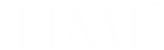

In [74]:
response = requests.get("https://time100.time.com/2013/04/18/time-100/slide/all/")
doc2013 = BeautifulSoup(response.content, "html.parser")
doc2013.prettify()

In [75]:
full2013 = doc2013.find(class_='full-list group col-1')
full2013_2 = doc2013.find(class_='full-list group col-2')
listofnames2013 = full2013.find_all('a')
listofnames2013_2 = full2013_2.find_all('a')

allnames2013 = []

count = 0

for listppl in listofnames2013:
    name = (listppl.text)
    links = listppl['href']
    link = 'content.time.com' + links
    count = count + 1
    #print (count, name, link)
    
    if 0 < count < 21:
        category = 'TITANS'
        
    if 20 < count < 44:
        category = 'LEADERS'
  
    if 43 < count < 59:
         category = 'ARTISTS'

    eachdict = {'Name': name, 
                 'Category': category,
                 'Year': '2013',
                 'Link': link}

    allnames2013.append(eachdict)

for listppl in listofnames2013_2:
    name = (listppl.text)
    links = listppl['href']
    link = 'content.time.com' + links
    count = count + 1
    
    #print (count, name, link)
    if 58 < count < 81:
        category = 'PIONEERS'
        
    if 80 < count < 101:
         category = 'ICONS'
    
    eachdict2 = {'Name': name, 
                 'Category': category,
                 'Year': '2013',
                 'Link': link}
    
    allnames2013.append(eachdict2)

allnames2013
    

[{'Name': 'Jay Z',
  'Category': 'TITANS',
  'Year': '2013',
  'Link': 'content.time.comhttps://time100.time.com/2013/04/18/time-100/slide/jay-z/'},
 {'Name': 'Valerie Jarrett',
  'Category': 'TITANS',
  'Year': '2013',
  'Link': 'content.time.comhttps://time100.time.com/2013/04/18/time-100/slide/valerie-jarrett/'},
 {'Name': 'Elon Musk',
  'Category': 'TITANS',
  'Year': '2013',
  'Link': 'content.time.comhttps://time100.time.com/2013/04/18/time-100/slide/elon-musk/'},
 {'Name': 'Oh-Hyun Kwon',
  'Category': 'TITANS',
  'Year': '2013',
  'Link': 'content.time.comhttps://time100.time.com/2013/04/18/time-100/slide/oh-hyun-kwon/'},
 {'Name': 'Scooter Braun',
  'Category': 'TITANS',
  'Year': '2013',
  'Link': 'content.time.comhttps://time100.time.com/2013/04/18/time-100/slide/scooter-braun/'},
 {'Name': 'Kevin Systrom',
  'Category': 'TITANS',
  'Year': '2013',
  'Link': 'content.time.comhttps://time100.time.com/2013/04/18/time-100/slide/kevin-systrom/'},
 {'Name': 'Michael Kors',
  'Cat

In [76]:
len(allnames2013)

94

In [77]:
df13 = pd.DataFrame(allnames2013)

df13

Name  Category  Year  \
0                                                 Jay Z    TITANS  2013   
1                                       Valerie Jarrett    TITANS  2013   
2                                             Elon Musk    TITANS  2013   
3                                          Oh-Hyun Kwon    TITANS  2013   
4                                         Scooter Braun    TITANS  2013   
5                                         Kevin Systrom    TITANS  2013   
6                                          Michael Kors    TITANS  2013   
7                               Palaniappan Chidambaram    TITANS  2013   
8                                          Ren Zhengfei    TITANS  2013   
9                                          Ted Sarandos    TITANS  2013   
10                                        Gina Rinehart    TITANS  2013   
11                   Markus Persson and Jens Bergensten    TITANS  2013   
12                                          Igor Sechin    TITANS  2013   
13                                        Tadashi Yanai    TITANS  2013   
14                                            Sam Yagan    TITANS  2013   
15                                        Shonda Rhimes    TITANS  2013   
16                                         Lebron James    TITANS  2013   
17                                        David Einhorn    TITANS  2013   
18                                       Magnus Carlsen    TITANS  2013   
19                                      Sheryl Sandberg    TITANS  2013   
20                                            Rand Paul   LEADERS  2013   
21                                        Noynoy Aquino   LEADERS  2013   
22                                         Barack Obama   LEADERS  2013   
23                                       Chris Christie   LEADERS  2013   
24                                 Hassan Sheik Mohamud   LEADERS  2013   
25                                         John Brennan   LEADERS  2013   
26                                        Park Geun-hye   LEADERS  2013   
27                                           Yair Lapid   LEADERS  2013   
28                                       Wayne LaPierre   LEADERS  2013   
29                                        Kamala Harris   LEADERS  2013   
30                                      Fethullah Gulen   LEADERS  2013   
31                                           Xi Jinping   LEADERS  2013   
32                                    Wilfredo De Jesús   LEADERS  2013   
33                                           Tom Coburn   LEADERS  2013   
34                                          Kim Jong Un   LEADERS  2013   
35                                      Abdullah Ocalan   LEADERS  2013   
36                                   Enrique Peña Nieto   LEADERS  2013   
37                                          Elena Kagan   LEADERS  2013   
38                                            Joe Biden   LEADERS  2013   
39                                      Susana Martinez   LEADERS  2013   
40                                         Mario Draghi   LEADERS  2013   
41                                          Joyce Banda   LEADERS  2013   
42                                         Pope Francis   LEADERS  2013   
43                                    Jennifer Lawrence   ARTISTS  2013   
44                                   Christina Aguilera   ARTISTS  2013   
45                                     Steven Spielberg   ARTISTS  2013   
46                                         Jonathan Ive   ARTISTS  2013   
47                                           Alex Atala   ARTISTS  2013   
48                                            Ed Ruscha   ARTISTS  2013   
49                                               Miguel   ARTISTS  2013   
50                                         Mindy Kaling   ARTISTS  2013   
51                                          Jenna Lyons   ARTISTS  2013   
52                                       Bryan Cranston   ARTISTS  2013   
5

In [78]:
df13.to_csv('2013_Times_Scraped_List.csv',sep=',',index=False)

In [79]:
urlnames2013 = []
for eachname in df13.Name:
        eachname = eachname.replace(" ","+")
        urlnames2013.append(f"https://www.google.com/search?q={eachname}")
        
urlnames2013

['https://www.google.com/search?q=Jay+Z',
 'https://www.google.com/search?q=Valerie+Jarrett',
 'https://www.google.com/search?q=Elon+Musk',
 'https://www.google.com/search?q=Oh-Hyun+Kwon',
 'https://www.google.com/search?q=Scooter+Braun',
 'https://www.google.com/search?q=Kevin+Systrom',
 'https://www.google.com/search?q=Michael+Kors',
 'https://www.google.com/search?q=Palaniappan+Chidambaram',
 'https://www.google.com/search?q=Ren+Zhengfei',
 'https://www.google.com/search?q=Ted+Sarandos',
 'https://www.google.com/search?q=Gina+Rinehart',
 'https://www.google.com/search?q=Markus+Persson+and+Jens+Bergensten',
 'https://www.google.com/search?q=Igor+Sechin',
 'https://www.google.com/search?q=Tadashi+Yanai',
 'https://www.google.com/search?q=Sam+Yagan',
 'https://www.google.com/search?q=Shonda+Rhimes',
 'https://www.google.com/search?q=Lebron+James',
 'https://www.google.com/search?q=David+Einhorn',
 'https://www.google.com/search?q=Magnus+Carlsen',
 'https://www.google.com/search?q=Shery

In [80]:
driver = webdriver.Chrome()

In [81]:
import time

full_list2013 = []

for url in urlnames2013:
    driver.get(url)
    
    try:
        names = driver.find_element_by_class_name("SPZz6b").text 
        name = (names.split('\n'))[0]
        
    except: 
        name = 'Null'

    try:
        label = driver.find_element_by_class_name("wwUB2c").text
    except: 
        label = 'Null'

    try:
        born = driver.find_element_by_class_name("rVusze").text
    except: 
        born = 'Null'

    try:
        full_desc = driver.find_element_by_class_name("kno-rdesc").text
    except: 
        full_desc = 'Null'

    person_info = {'Name': name,
                    'Profession': label,
                    'Birth Info': born,
                    'Description': full_desc}
    
    full_list2013.append(person_info)
    
    time.sleep(1)

print (len(full_list2013))
full_list2013

94


[{'Name': 'Jay-Z',
  'Profession': 'American rapper',
  'Birth Info': 'Born: December 4, 1969 (age 51 years), Brooklyn, New York, NY',
  'Description': 'Description\nShawn Corey Carter, known professionally as Jay-Z, is an American rapper, songwriter, record executive, businessman, and record producer. He is widely regarded as one of the most influential hip-hop artists in history, and often cited as one of the greatest rappers of all time. Wikipedia'},
 {'Name': 'Valerie Jarrett',
  'Profession': 'American businesswoman',
  'Birth Info': 'Born: November 14, 1956 (age 64 years), Shiraz, Iran',
  'Description': 'Description\nValerie June Jarrett is an American businesswoman and former government official. She served as the senior advisor to U.S. President Barack Obama and assistant to the president for public engagement and intergovernmental affairs from 2009 to 2017. Wikipedia'},
 {'Name': 'Elon Musk',
  'Profession': 'CEO of SpaceX',
  'Birth Info': 'Net worth: 144.7 billion USD (2020

In [82]:
df13b = pd.DataFrame(full_list2013)
df13b

Name  \
0                             Jay-Z   
1                   Valerie Jarrett   
2                         Elon Musk   
3                      Kwon Oh-hyun   
4                     Scooter Braun   
5                     Kevin Systrom   
6                      Michael Kors   
7                    P. Chidambaram   
8                      Ren Zhengfei   
9                      Ted Sarandos   
10                    Gina Rinehart   
11                             Null   
12                      Igor Sechin   
13                    Tadashi Yanai   
14                        Sam Yagan   
15                    Shonda Rhimes   
16                     LeBron James   
17                    David Einhorn   
18                   Magnus Carlsen   
19                  Sheryl Sandberg   
20                        Rand Paul   
21               Benigno Aquino III   
22                     Barack Obama   
23                   Chris Christie   
24            Hassan Sheikh Mohamud   
25                  John O. Brennan   
26                    Park Geun-hye   
27                       Yair Lapid   
28                   Wayne LaPierre   
29                    Kamala Harris   
30                  Fethullah Gülen   
31                       Xi Jinping   
32                See results about   
33                       Tom Coburn   
34                      Kim Jong-un   
35                  Abdullah Öcalan   
36               Enrique Peña Nieto   
37                      Elena Kagan   
38                        Joe Biden   
39                  Susana Martinez   
40                     Mario Draghi   
41                      Joyce Banda   
42                     Pope Francis   
43                Jennifer Lawrence   
44               Christina Aguilera   
45                 Steven Spielberg   
46                         Jony Ive   
47                       Alex Atala   
48                    Edward Ruscha   
49                           Miguel   
50                     Mindy Kaling   
51                      Jenna Lyons   
52                   Bryan Cranston   
53                  George Saunders   
54                     Jimmy Kimmel   
55                         Wang Shu   
56                    Hilary Mantel   
57                      Frank Ocean   
58                     Jimmy Fallon   
59                       Aamir Khan   
60                             Null   
61                    Marissa Mayer   
62                             Null   
63                   Bassem Youssef   
64                  Joaquim Barbosa   
65                    Vrinda Grover   
66                       Perry Chen   
67                     Roya Mahboob   
68                    David Coleman   
69                    Travis Tygart   
70                    Eric Greitens   
71                     Andrew Sheng   
72                             Null   
73                      Jared Cohen   
74                  Moncef Marzouki   
75                             Null   
76     Dr. Kimberly L. Blackwell MD   
77                       Kai-Fu Lee   
78                  Mary D. Nichols   
79                             Null   
80                 Malala Yousafzai   
81                      Lena Dunham   
82                  Mario Balotelli   
83                      Peng Liyuan   
84                 Aung San Suu Kyi   
85           Omotola Jalade Ekeinde   
86                     Lindsey Vonn   
87                Justin Timberlake   
88                   Gabby Giffords   
89                          Beyoncé   
90                 Daniel Day-Lewis   
91  Catherine, Duchess of Cambridge   
92                   Michelle Obama   
93                            Li Na   

                                                                       Profession  \
0                                                                 American rapper   
1                                                          American businesswoman   
2                                                                   CE

In [83]:
df13b['Birthplace'] = df13b['Birth Info'].str.extract(r"\), ([\w\W]+)")
df13b['Birthdate'] = df13b['Birth Info'].str.extract (r"Born: ([\w\s\d\,]+) [\(age]?")
df13b['Age'] = df13b['Birth Info'].str.extract(r"\(age ([\d]*) years\)")
df13b['Description'] = df13b.Description.str.replace('Description\n', '')
df13b['Description'] = df13b.Description.str.replace('Wikipedia', '')

try:
    df13b['Pronouns'] = df13b['Description'].str.extract(r"\b(she|he|her|his)(?i)\b")
    
except:
    pass


df13b

Name  \
0                             Jay-Z   
1                   Valerie Jarrett   
2                         Elon Musk   
3                      Kwon Oh-hyun   
4                     Scooter Braun   
5                     Kevin Systrom   
6                      Michael Kors   
7                    P. Chidambaram   
8                      Ren Zhengfei   
9                      Ted Sarandos   
10                    Gina Rinehart   
11                             Null   
12                      Igor Sechin   
13                    Tadashi Yanai   
14                        Sam Yagan   
15                    Shonda Rhimes   
16                     LeBron James   
17                    David Einhorn   
18                   Magnus Carlsen   
19                  Sheryl Sandberg   
20                        Rand Paul   
21               Benigno Aquino III   
22                     Barack Obama   
23                   Chris Christie   
24            Hassan Sheikh Mohamud   
25                  John O. Brennan   
26                    Park Geun-hye   
27                       Yair Lapid   
28                   Wayne LaPierre   
29                    Kamala Harris   
30                  Fethullah Gülen   
31                       Xi Jinping   
32                See results about   
33                       Tom Coburn   
34                      Kim Jong-un   
35                  Abdullah Öcalan   
36               Enrique Peña Nieto   
37                      Elena Kagan   
38                        Joe Biden   
39                  Susana Martinez   
40                     Mario Draghi   
41                      Joyce Banda   
42                     Pope Francis   
43                Jennifer Lawrence   
44               Christina Aguilera   
45                 Steven Spielberg   
46                         Jony Ive   
47                       Alex Atala   
48                    Edward Ruscha   
49                           Miguel   
50                     Mindy Kaling   
51                      Jenna Lyons   
52                   Bryan Cranston   
53                  George Saunders   
54                     Jimmy Kimmel   
55                         Wang Shu   
56                    Hilary Mantel   
57                      Frank Ocean   
58                     Jimmy Fallon   
59                       Aamir Khan   
60                             Null   
61                    Marissa Mayer   
62                             Null   
63                   Bassem Youssef   
64                  Joaquim Barbosa   
65                    Vrinda Grover   
66                       Perry Chen   
67                     Roya Mahboob   
68                    David Coleman   
69                    Travis Tygart   
70                    Eric Greitens   
71                     Andrew Sheng   
72                             Null   
73                      Jared Cohen   
74                  Moncef Marzouki   
75                             Null   
76     Dr. Kimberly L. Blackwell MD   
77                       Kai-Fu Lee   
78                  Mary D. Nichols   
79                             Null   
80                 Malala Yousafzai   
81                      Lena Dunham   
82                  Mario Balotelli   
83                      Peng Liyuan   
84                 Aung San Suu Kyi   
85           Omotola Jalade Ekeinde   
86                     Lindsey Vonn   
87                Justin Timberlake   
88                   Gabby Giffords   
89                          Beyoncé   
90                 Daniel Day-Lewis   
91  Catherine, Duchess of Cambridge   
92                   Michelle Obama   
93                            Li Na   

                                                                       Profession  \
0                                                                 American rapper   
1                                                          American businesswoman   
2                                                                   CE

In [84]:
df13b.to_csv("2013_Demographic_Data.csv",index=False)

In [85]:
time2013 = df13.join(df13b, rsuffix='_right')

time2013

Name  Category  Year  \
0                                                 Jay Z    TITANS  2013   
1                                       Valerie Jarrett    TITANS  2013   
2                                             Elon Musk    TITANS  2013   
3                                          Oh-Hyun Kwon    TITANS  2013   
4                                         Scooter Braun    TITANS  2013   
5                                         Kevin Systrom    TITANS  2013   
6                                          Michael Kors    TITANS  2013   
7                               Palaniappan Chidambaram    TITANS  2013   
8                                          Ren Zhengfei    TITANS  2013   
9                                          Ted Sarandos    TITANS  2013   
10                                        Gina Rinehart    TITANS  2013   
11                   Markus Persson and Jens Bergensten    TITANS  2013   
12                                          Igor Sechin    TITANS  2013   
13                                        Tadashi Yanai    TITANS  2013   
14                                            Sam Yagan    TITANS  2013   
15                                        Shonda Rhimes    TITANS  2013   
16                                         Lebron James    TITANS  2013   
17                                        David Einhorn    TITANS  2013   
18                                       Magnus Carlsen    TITANS  2013   
19                                      Sheryl Sandberg    TITANS  2013   
20                                            Rand Paul   LEADERS  2013   
21                                        Noynoy Aquino   LEADERS  2013   
22                                         Barack Obama   LEADERS  2013   
23                                       Chris Christie   LEADERS  2013   
24                                 Hassan Sheik Mohamud   LEADERS  2013   
25                                         John Brennan   LEADERS  2013   
26                                        Park Geun-hye   LEADERS  2013   
27                                           Yair Lapid   LEADERS  2013   
28                                       Wayne LaPierre   LEADERS  2013   
29                                        Kamala Harris   LEADERS  2013   
30                                      Fethullah Gulen   LEADERS  2013   
31                                           Xi Jinping   LEADERS  2013   
32                                    Wilfredo De Jesús   LEADERS  2013   
33                                           Tom Coburn   LEADERS  2013   
34                                          Kim Jong Un   LEADERS  2013   
35                                      Abdullah Ocalan   LEADERS  2013   
36                                   Enrique Peña Nieto   LEADERS  2013   
37                                          Elena Kagan   LEADERS  2013   
38                                            Joe Biden   LEADERS  2013   
39                                      Susana Martinez   LEADERS  2013   
40                                         Mario Draghi   LEADERS  2013   
41                                          Joyce Banda   LEADERS  2013   
42                                         Pope Francis   LEADERS  2013   
43                                    Jennifer Lawrence   ARTISTS  2013   
44                                   Christina Aguilera   ARTISTS  2013   
45                                     Steven Spielberg   ARTISTS  2013   
46                                         Jonathan Ive   ARTISTS  2013   
47                                           Alex Atala   ARTISTS  2013   
48                                            Ed Ruscha   ARTISTS  2013   
49                                               Miguel   ARTISTS  2013   
50                                         Mindy Kaling   ARTISTS  2013   
51                                          Jenna Lyons   ARTISTS  2013   
52                                       Bryan Cranston   ARTISTS  2013   
5

In [86]:
time2013.to_csv("Time2013_Full_merged.csv")

## Time 2010

'<!--[if IE 5]> Vignette StoryServer 5.0 Wed Mar 26 09:36:36 2014 <![endif]-->\n<!DOCTYPE html>\n<!--[if lt IE 7]> <html lang="en-us" class="no-js ie lt-ie9 lt-ie8 lt-ie7"> <![endif]-->\n<!--[if IE 7]> <html lang="en-us" class="no-js ie lt-ie9 lt-ie8"> <![endif]-->\n<!--[if IE 8]> <html lang="en-us" class="no-js ie lt-ie9"> <![endif]-->\n<!--[if gt IE 8]><!-->\n<html class="no-js" lang="en-us">\n <!--<![endif]-->\n <head>\n  <title>\n   Complete List - The 2010 TIME 100 - TIME\n  </title>\n  <link href="http://img.timeinc.net/time/favicon.ico" rel="shortcut icon"/>\n  <meta charset="utf-8"/>\n  <meta content="In our annual TIME 100 issue we name the people who most affect our world..." name="description">\n   <meta content="width=device-width, initial-scale=1.0" name="viewport"/>\n   <meta content="1124331582,512158401,808970553" property="fb:admins"/>\n   <meta content="53177223193" property="fb:app_id"/>\n   <meta content="In our annual TIME 100 issue we name the people who most affe
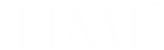

In [87]:
response = requests.get("http://content.time.com/time/specials/packages/completelist/0,29569,1984685,00.html")
doc2010 = BeautifulSoup(response.content, "html.parser")
doc2010.prettify()


In [88]:
full2010 = doc2010.find_all(class_='full-list')[0]
listofnames2010 = full2010.find_all('a')

allnames2010 = []
count = 0

for listppl in listofnames2010[:100]:
    name = (listppl.text)
    links = listppl['href']
    link = 'www.content.time.com' + links
    count = count + 1

    
    category = ''
    
    if 0 < count < 26:
        category = 'LEADERS'
        
    if 25 < count < 51:
        category = 'ICONS'
    
    if 50 < count < 76:
        category = 'ARTISTS'
        
    if 75 < count < 101:
        category = 'PIONEERS'
    
    eachdict = {'Name': name, 
                'Category': category,
                'Year': '2010',
                'Link': link}
    
    allnames2010.append(eachdict)

allnames2010
    

[{'Name': 'Luiz Inácio Lula da Silva ',
  'Category': 'LEADERS',
  'Year': '2010',
  'Link': 'www.content.time.com/time/specials/packages/article/0,28804,1984685_1984864_1984866,00.html'},
 {'Name': 'J.T. Wang ',
  'Category': 'LEADERS',
  'Year': '2010',
  'Link': 'www.content.time.com/time/specials/packages/article/0,28804,1984685_1984864_1985425,00.html'},
 {'Name': 'Admiral Mike Mullen ',
  'Category': 'LEADERS',
  'Year': '2010',
  'Link': 'www.content.time.com/time/specials/packages/article/0,28804,1984685_1984864_1985426,00.html'},
 {'Name': 'Barack Obama ',
  'Category': 'LEADERS',
  'Year': '2010',
  'Link': 'www.content.time.com/time/specials/packages/article/0,28804,1984685_1984864_1985427,00.html'},
 {'Name': 'Ron Bloom ',
  'Category': 'LEADERS',
  'Year': '2010',
  'Link': 'www.content.time.com/time/specials/packages/article/0,28804,1984685_1984864_1985429,00.html'},
 {'Name': 'Yukio Hatoyama ',
  'Category': 'LEADERS',
  'Year': '2010',
  'Link': 'www.content.time.com/ti

In [89]:
df10 = pd.DataFrame(allnames2010)


In [90]:
df10.to_csv('2010_Times_Scraped_List.csv',sep=',',index=False)

In [91]:
urlnames2010 = []
for eachname in df10.Name:
        eachname = eachname.replace(" ","+")
        urlnames2010.append(f"https://www.google.com/search?q={eachname}")
        
urlnames2010

['https://www.google.com/search?q=Luiz+Inácio+Lula+da+Silva+',
 'https://www.google.com/search?q=J.T.+Wang+',
 'https://www.google.com/search?q=Admiral+Mike+Mullen+',
 'https://www.google.com/search?q=Barack+Obama+',
 'https://www.google.com/search?q=Ron+Bloom+',
 'https://www.google.com/search?q=Yukio+Hatoyama+',
 'https://www.google.com/search?q=Dominique+Strauss-Kahn+',
 'https://www.google.com/search?q=Nancy+Pelosi+',
 'https://www.google.com/search?q=Sarah+Palin+',
 'https://www.google.com/search?q=Salam+Fayyad+',
 'https://www.google.com/search?q=Jon+Kyl+',
 'https://www.google.com/search?q=Glenn+Beck+',
 'https://www.google.com/search?q=Annise+Parker+',
 'https://www.google.com/search?q=Tidjane+Thiam+',
 'https://www.google.com/search?q=Jenny+Beth+Martin+',
 'https://www.google.com/search?q=Christine+Lagarde+',
 'https://www.google.com/search?q=Recep+Tayyip+Erdogan+',
 'https://www.google.com/search?q=General+Stanley+McChrystal+',
 'https://www.google.com/search?q=Manmohan+Singh

In [92]:
driver = webdriver.Chrome()

import time

full_list2010 = []

for url in urlnames2010:
    driver.get(url)
    
    try:
        names = driver.find_element_by_class_name("ZxoDOe").text 
        name = (names.split('\n'))[0]

    except:
        name = 'Null'

    try:
        label = driver.find_element_by_class_name("EGmpye").text
    except: 
        label = 'Null'

    try:
        born = driver.find_element_by_class_name("rVusze").text
    except: 
        born = 'Null'

    try:
        full_desc = driver.find_element_by_class_name("kno-rdesc").text
    except: 
        full_desc = 'Null'

    person_info = {'Name': name,
                    'Profession': label,
                    'Birth Info': born,
                    'Description': full_desc}
    
    full_list2010.append(person_info)
    
    time.sleep(1)

print (len(full_list2010))
full_list2010

100


[{'Name': 'Null',
  'Profession': 'Null',
  'Birth Info': 'Born: October 27, 1945 (age 75 years), Caetés, State of Pernambuco, Brazil',
  'Description': 'Description\nLuiz Inácio Lula da Silva, known as Lula, is a Brazilian politician and former union leader who served as the 35th President of Brazil from 1 January 2003 to 31 December 2010. Wikipedia'},
 {'Name': 'Null',
  'Profession': 'Null',
  'Birth Info': 'Born: July 1954 (age 66 years)',
  'Description': 'Null'},
 {'Name': 'Null',
  'Profession': 'Null',
  'Birth Info': 'Born: October 4, 1946 (age 74 years), Los Angeles County, CA',
  'Description': "Description\nMichael Glenn Mullen is a retired United States Navy admiral, who served as the 17th Chairman of the Joint Chiefs of Staff from October 1, 2007, to September 30, 2011. Mullen previously served as the Navy's 28th Chief of Naval Operations from July 22, 2005, to September 29, 2007. Wikipedia"},
 {'Name': 'Null',
  'Profession': 'Null',
  'Birth Info': 'Born: August 4, 1961

In [93]:
df10b = pd.DataFrame(full_list2010)

In [94]:
df10b['Birthplace'] = df10b['Birth Info'].str.extract(r"\), ([\w\W]+)")
df10b['Birthdate'] = df10b['Birth Info'].str.extract (r"Born: ([\w\s\d\,]+) [\(age]?")
df10b['Age'] = df10b['Birth Info'].str.extract(r"\(age ([\d]*) years\)")
df10b['Description'] = df10b.Description.str.replace('Description\n', '')
df10b['Description'] = df10b.Description.str.replace('Wikipedia', '')

try:
    df10b['Pronouns'] = df10b['Description'].str.extract(r"\b(she|he|her|his)(?i)\b")
    
except:
    pass


df10b

Name Profession  \
0   Null       Null   
1   Null       Null   
2   Null       Null   
3   Null       Null   
4   Null       Null   
5   Null       Null   
6   Null       Null   
7   Null       Null   
8   Null       Null   
9   Null       Null   
10  Null       Null   
11  Null       Null   
12  Null       Null   
13  Null       Null   
14  Null       Null   
15  Null       Null   
16  Null       Null   
17  Null       Null   
18  Null       Null   
19  Null       Null   
20  Null       Null   
21  Null       Null   
22  Null       Null   
23  Null       Null   
24  Null       Null   
25  Null       Null   
26  Null       Null   
27  Null       Null   
28  Null       Null   
29  Null       Null   
30  Null       Null   
31  Null       Null   
32  Null       Null   
33  Null       Null   
34  Null       Null   
35  Null       Null   
36  Null       Null   
37  Null       Null   
38  Null       Null   
39  Null       Null   
40  Null       Null   
41  Null       Null   
42  Null       Null   
43  Null       Null   
44  Null       Null   
45  Null       Null   
46  Null       Null   
47  Null       Null   
48  Null       Null   
49  Null       Null   
50  Null       Null   
51  Null       Null   
52  Null       Null   
53  Null       Null   
54  Null       Null   
55  Null       Null   
56  Null       Null   
57  Null       Null   
58  Null       Null   
59  Null       Null   
60  Null       Null   
61  Null       Null   
62  Null       Null   
63  Null       Null   
64  Null       Null   
65  Null       Null   
66  Null       Null   
67  Null       Null   
68  Null       Null   
69  Null       Null   
70  Null       Null   
71  Null       Null   
72  Null       Null   
73  Null       Null   
74  Null       Null   
75  Null       Null   
76  Null       Null   
77  Null       Null   
78  Null       Null   
79  Null       Null   
80  Null       Null   
81  Null       Null   
82  Null       Null   
83  Null       Null   
84  Null       Null   
85  Null       Null   
86  Null       Null   
87  Null       Null   
88  Null       Null   
89  Null       Null   
90  Null       Null   
91  Null       Null   
92  Null       Null   
93  Null       Null   
94  Null       Null   
95  Null       Null   
96  Null       Null   
97  Null       Null   
98  Null       Null   
99  Null       Null   

                                                                                           Birth Info  \
0                          Born: October 27, 1945 (age 75 years), Caetés, State of Pernambuco, Brazil   
1                                                                      Born: July 1954 (age 66 years)   
2                                        Born: October 4, 1946 (age 74 years), Los Angeles County, CA   
3   Born: August 4, 1961 (age 59 years), Kapiʻolani Medical Center for Women & Children, Honolulu, HI   
4                                                             Born: 1956 (age 64 years), New York, NY   
5                                   Born: February 11, 1947 (age 73 years), Bunkyo City, Tokyo, Japan   
6                                      Born: April 25, 1949 (age 71 years), Neuilly-sur-Seine, France   
7                                                  Born: March 26, 1940 (age 80 years), Baltimore, MD   
8                                               Born: February 11, 1964 (age 56 years), Sandpoint, ID   
9                                                 Born: April 12, 1952 (age 68 years), Deir al-Ghusun   
10                                                   Born: April 25, 1942 (age 78 years), Oakland, NE   
11                                                Born: February 10, 1964 (age 56 years), Everett, WA   
12                                                     Born: May 17, 1956 (age 64 years), Houston, TX   
13                                                  Born: July 29, 1962 (age 58 years), Côte d'Ivoire   
14                                                         Born: July 2, 1970 (age 50 years), Georgia   


In [95]:
df10b.to_csv("2010_Demographic_Data.csv",index=False)

In [96]:
time2010 = df10.join(df10b, rsuffix='_right')

time2010

Name  Category  Year  \
0                 Luiz Inácio Lula da Silva    LEADERS  2010   
1                                 J.T. Wang    LEADERS  2010   
2                       Admiral Mike Mullen    LEADERS  2010   
3                              Barack Obama    LEADERS  2010   
4                                 Ron Bloom    LEADERS  2010   
5                            Yukio Hatoyama    LEADERS  2010   
6                    Dominique Strauss-Kahn    LEADERS  2010   
7                              Nancy Pelosi    LEADERS  2010   
8                               Sarah Palin    LEADERS  2010   
9                              Salam Fayyad    LEADERS  2010   
10                                  Jon Kyl    LEADERS  2010   
11                               Glenn Beck    LEADERS  2010   
12                            Annise Parker    LEADERS  2010   
13                            Tidjane Thiam    LEADERS  2010   
14                        Jenny Beth Martin    LEADERS  2010   
15                        Christine Lagarde    LEADERS  2010   
16                     Recep Tayyip Erdogan    LEADERS  2010   
17               General Stanley McChrystal    LEADERS  2010   
18                           Manmohan Singh    LEADERS  2010   
19                                 Bo Xilai    LEADERS  2010   
20                              Mark Carney    LEADERS  2010   
21                      Sister Carol Keehan    LEADERS  2010   
22        Sheik Khalifa bin Zayed al-Nahyan    LEADERS  2010   
23                                 Robin Li    LEADERS  2010   
24                              Scott Brown    LEADERS  2010   
25                             Bill Clinton      ICONS  2010   
26                                Kim Yu-Na      ICONS  2010   
27                      Mir-Hossein Mousavi      ICONS  2010   
28                              Ben Stiller      ICONS  2010   
29                           Temple Grandin      ICONS  2010   
30                        P. Namperumalsamy      ICONS  2010   
31                           Nay Phone Latt      ICONS  2010   
32                             Chen Shu-chu      ICONS  2010   
33                           Phil Mickelson      ICONS  2010   
34                            Didier Drogba      ICONS  2010   
35                             Graça Machel      ICONS  2010   
36                           Reem Al Numery      ICONS  2010   
37                         Sachin Tendulkar      ICONS  2010   
38                          Tristan Lecomte      ICONS  2010   
39                              Liya Kebede      ICONS  2010   
40                      Kiran Mazumdar-Shaw      ICONS  2010   
41                          Zahra Rahnavard      ICONS  2010   
42                                   Jet Li      ICONS  2010   
43                          Serena Williams      ICONS  2010   
44        Chief Master Sergeant Tony Travis      ICONS  2010   
45                          Karls Paul-Noel      ICONS  2010   
46                              Rahul Singh      ICONS  2010   
47                             Valentin Abe      ICONS  2010   
48                             Malalai Joya      ICONS  2010   
49                               Will Allen      ICONS  2010   
50                                Lady Gaga    ARTISTS  2010   
51                            Conan O'Brien    ARTISTS  2010   
52                          Kathryn Bigelow    ARTISTS  2010   
53                            Oprah Winfrey    ARTISTS  2010   
54                           Valery Gergiev    ARTISTS  2010   
55                         Robert Pattinson    ARTISTS  2010   
56                           Ashton Kutcher    ARTISTS  2010   
57                          Suzanne Collins    ARTISTS  2010   
58                             Taylor Swift    ARTISTS  2010   
59                      Neil Patrick Harris    ARTISTS  2010   
60          Carlton Cuse and Damon Lindelof    ARTISTS  2010   
61                                   Prince    ARTISTS  2010   
62      

In [97]:
time2010.to_csv("Time2010_Full_merged.csv")

## Time 2007


In [98]:
response = requests.get("http://content.time.com/time/specials/packages/completelist/0,29569,1595326,00.html")
doc2007 = BeautifulSoup(response.content, "html.parser")
doc2007.prettify()

full2007 = doc2007.find_all(class_='full-list')[0]
listofnames2007 = full2007.find_all('a')

allnames2007 = []
count = 0

for listppl in listofnames2007[:100]:
    name = (listppl.text)
    links = listppl['href']
    link = 'content.time.com' + links
    count = count + 1
    

    category = ''
    
    if 0 < count < 23:
        category = 'ARTISTS'
        
    if 22 < count < 44:
        category = 'LEADERS'
  
    if 43 < count < 63:
         category = 'PIONEERS'

    if 62 < count < 82:
        category = 'ICONS AND THINKERS'
        
    if 81 < count < 101:
         category = 'TITANS'
    
    eachdict = {'Name': name, 
                 'Category': category,
                 'Year': '2007',
                 'Link': link}
    
    allnames2007.append(eachdict)

allnames2007
    
#--------------------
#len(allnames2007)

df07 = pd.DataFrame(allnames2007)


df07.to_csv('2007_Times_Scraped_List.csv',sep=',',index=False)
df07

urlnames2007 = []
for eachname in df07.Name:
        eachname = eachname.replace(" ","+")
        urlnames2007.append(f"https://www.google.com/search?q={eachname}")
        
urlnames2007

driver = webdriver.Chrome()



full_list2007 = []

for url in urlnames2007:
    driver.get(url)
    
    try:
        names = driver.find_element_by_class_name("ZxoDOe").text 
        name = (names.split('\n'))[0]

    except:
        name = 'Null'

    try:
        label = driver.find_element_by_class_name("EGmpye").text
    except: 
        label = 'Null'

    try:
        born = driver.find_element_by_class_name("rVusze").text
    except: 
        born = 'Null'

    try:
        full_desc = driver.find_element_by_class_name("kno-rdesc").text
    except: 
        full_desc = 'Null'

    person_info = {'Name': name,
                    'Profession': label,
                    'Birth Info': born,
                    'Description': full_desc}
    
    full_list2007.append(person_info)
    
    time.sleep(1)

print (len(full_list2007))
full_list2007


df07b = pd.DataFrame(full_list2007)
df07b

df07b['Birthplace'] = df07b['Birth Info'].str.extract(r"\), ([\w\W]+)")
df07b['Birthdate'] = df07b['Birth Info'].str.extract (r"Born: ([\w\s\d\,]+) [\(age]?")
df07b['Age'] = df07b['Birth Info'].str.extract(r"\(age ([\d]*) years\)")
df07b['Description'] = df07b.Description.str.replace('Description\n', '')
df07b['Description'] = df07b.Description.str.replace('Wikipedia', '')

try:
    df07b['Pronouns'] = df07b['Description'].str.extract(r"\b(she|he|her|his)(?i)\b")
    
except:
    pass



df07b.to_csv("2007_Demographic_Data.csv",index=False)


time2007 = df07.join(df07b, rsuffix='_right')
time2007.to_csv("Time2007_Full_merged.csv")



100


In [99]:
time2007

Name            Category  \
0                                              Tina Fey              ARTISTS   
1                                        Youssou N'Dour              ARTISTS   
2                                         Anna Netrebko              ARTISTS   
3                                     Justin Timberlake              ARTISTS   
4                                     Sacha Baron Cohen              ARTISTS   
5                                     Leonardo DiCaprio              ARTISTS   
6                                          Nora Roberts              ARTISTS   
7                                            Rick Rubin              ARTISTS   
8                                       Martin Scorsese              ARTISTS   
9                                        Cate Blanchett              ARTISTS   
10                                          Alber Elbaz              ARTISTS   
11                                      America Ferrera              ARTISTS   
12                                         Simon Fuller              ARTISTS   
13                                         Brian Grazer              ARTISTS   
14                                           John Mayer              ARTISTS   
15                                       David Mitchell              ARTISTS   
16                                            Kate Moss              ARTISTS   
17                                      Rosie O'Donnell              ARTISTS   
18                                            Brad Pitt              ARTISTS   
19                                        Shonda Rhimes              ARTISTS   
20                                          Kara Walker              ARTISTS   
21                                       Brian Williams              ARTISTS   
22                                   Queen Elizabeth II              LEADERS   
23                                          Tzipi Livni              LEADERS   
24                                        Peter Akinola              LEADERS   
25                                               Liu Qi              LEADERS   
26                                     Condoleezza Rice              LEADERS   
27                                Omar Hassan al-Bashir              LEADERS   
28                                         John Roberts              LEADERS   
29                                         Sonia Gandhi              LEADERS   
30                                          Raúl Castro              LEADERS   
31                                Arnold Schwarzenegger              LEADERS   
32                               General David Petraeus              LEADERS   
33                                      Hillary Clinton              LEADERS   
34                                            Hu Jintao              LEADERS   
35                                        King Abdullah              LEADERS   
36                                         Nancy Pelosi              LEADERS   
37                                         Barack Obama              LEADERS   
38                                    Michael Bloomberg              LEADERS   
39                               Ayatullah Ali Khamenei              LEADERS   
40                                    Pope Benedict XVI              LEADERS   
41                                        Angela Merkel              LEADERS   
42                                      Osama bin Laden              LEADERS   
43                                        Oprah Winfrey             PIONEERS   
44                                    Elizabeth Edwards             PIONEERS   
45                                       Warren Buffett             PIONEERS   
46                                    Drew Gilpin Faust             PIONEERS   
47                                        Wesley Autrey             PIONEERS   
48                                           Tony Dungy             PIONEERS   
49  Federer: The Artistry of the World's Top Tennis 

## Time 2004

In [100]:
response = requests.get("http://content.time.com/time/specials/packages/completelist/0,29569,1970858,00.html")
doc = BeautifulSoup(response.content, "html.parser")
doc.prettify()

full = doc.find_all(class_='full-list')[0]
listofnames = full.find_all('a')

allnames2004 = []
count = 0

for listppl in listofnames[:100]:
    name = (listppl.text)
    links = listppl['href']
    link = 'www.content.time.com' + links
    count = count + 1

    category = ''
    
    if 0 < count < 21:
        category = 'LEADERS'
        
    if 20 < count < 41:
        category = 'TITANS'
  
    if 40 < count < 61:
         category = 'ARTISTS'

    if 60 < count < 81:
        category = 'ICONS'
        
    if 80 < count < 101:
         category = 'PIONEERS'
    
    eachdict = {'Name': name, 
                 'Category': category,
                 'Year': '2004',
                 'Link': link}
    
    allnames2004.append(eachdict)

allnames2004
    

len(allnames2004)

df = pd.DataFrame(allnames2004)


df.to_csv('2004_Times_Scraped_List.csv',sep=',',index=False)


urlnames = []
for eachname in df.Name:
        eachname = eachname.replace(" ","+")
        urlnames.append(f"https://www.google.com/search?q={eachname}")
        
urlnames

driver = webdriver.Chrome()



import time

full_list = []

for url in urlnames:
    driver.get(url)
    
    try:
        names = driver.find_element_by_class_name("SPZz6b").text 
        name = (names.split('\n'))[0]

    except:
        name = 'Null'

    try:
        label = driver.find_element_by_class_name("wwUB2c").text
    except: 
        label = 'Null'

    try:
        born = driver.find_element_by_class_name("rVusze").text
    except: 
        born = 'Null'

    try:
        full_desc = driver.find_element_by_class_name("kno-rdesc").text
    except: 
        full_desc = 'Null'

    person_info = {'Name': name,
                    'Profession': label,
                    'Birth Info': born,
                    'Description': full_desc}
    
    full_list.append(person_info)
    
    time.sleep(1)

print (len(full_list))
full_list



df2 = pd.DataFrame(full_list)
df2

df2['Birthplace'] = df2['Birth Info'].str.extract(r"\), ([\w\W]+)")
df2['Birthdate'] = df2['Birth Info'].str.extract (r"Born: ([\w\s\d\,]+) [\(age]?")
df2['Age'] = df2['Birth Info'].str.extract(r"\(age ([\d]*) years\)")
df2['Description'] = df2.Description.str.replace('Description\n', '')
df2['Description'] = df2.Description.str.replace('Wikipedia', '')

try:
    df2['Pronouns'] = df2['Description'].str.extract(r"\b(she|he|her|his)(?i)\b")
    
except:
    pass





df2.to_csv("2004_Demographic_Data.csv",index=False)

time2004 = df.join(df2, rsuffix='_right')


time2004.to_csv("Time2004_Full_merged.csv")


time2004







100


Name  Category  Year  \
0              George W. Bush    LEADERS  2004   
1                   Hu Jintao    LEADERS  2004   
2   Luiz Inácio Lula da Silva    LEADERS  2004   
3         Ali Husaini Sistani    LEADERS  2004   
4             Toshihiko Fukui    LEADERS  2004   
5              Abu al-Zarqawi    LEADERS  2004   
6                  Kofi Annan    LEADERS  2004   
7             Condoleeza Rice    LEADERS  2004   
8        Recep Tayyip Erdogan    LEADERS  2004   
9                John Abizaid    LEADERS  2004   
10                Kim Jong Il    LEADERS  2004   
11                 Bill Gates    LEADERS  2004   
12          Pope John Paul II    LEADERS  2004   
13       Atal Bihari Vajpayee    LEADERS  2004   
14                 John Kerry    LEADERS  2004   
15                Luisa Diogo    LEADERS  2004   
16              Vladmir Putin    LEADERS  2004   
17                      Wu Yi    LEADERS  2004   
18            Osama bin Laden    LEADERS  2004   
19               The Clintons    LEADERS  2004   
20                  Lee Scott     TITANS  2004   
21              Carly Fiorina     TITANS  2004   
22            Abigail Johnson     TITANS  2004   
23             David Neeleman     TITANS  2004   
24             Rupert Murdoch     TITANS  2004   
25         Lindsay Owen-Jones     TITANS  2004   
26             Howard Schultz     TITANS  2004   
27                Azim Premji     TITANS  2004   
28             Warren Buffett     TITANS  2004   
29               Michael Dell     TITANS  2004   
30                 Al-Jazeera     TITANS  2004   
31           Lord John Browne     TITANS  2004   
32  Hiroshi Okuda / Fujio Cho     TITANS  2004   
33   Sergei Brin / Larry Page     TITANS  2004   
34            Bernard Arnault     TITANS  2004   
35               Sepp Blatter     TITANS  2004   
36           Belinda Stronach     TITANS  2004   
37                Meg Whitman     TITANS  2004   
38             Daniel Vasella     TITANS  2004   
39                 Steve Jobs     TITANS  2004   
40               Mark Burnett    ARTISTS  2004   
41                Frank Gehry    ARTISTS  2004   
42              John Galliano    ARTISTS  2004   
43              Peter Jackson    ARTISTS  2004   
44            Nicholas Hytner    ARTISTS  2004   
45               Simon Cowell    ARTISTS  2004   
46                    OutKast    ARTISTS  2004   
47                Norah Jones    ARTISTS  2004   
48          Jerry Bruckheimer    ARTISTS  2004   
49               J.K. Rowling    ARTISTS  2004   
50               Ken Kutaragi    ARTISTS  2004   
51               Bruce Nauman    ARTISTS  2004   
52               Katie Couric    ARTISTS  2004   
53            Charlie Kaufman    ARTISTS  2004   
54               Hideo Nakata    ARTISTS  2004   
55              Aishwarya Rai    ARTISTS  2004   
56               Ferran Adrià    ARTISTS  2004   
57              Nicole Kidman    ARTISTS  2004   
58                  Sean Penn    ARTISTS  2004   
59              Guy Laliberté    ARTISTS  2004   
60             Nelson Mandela      ICONS  2004   
61           Aung San Suu Kyi      ICONS  2004   
62      Queen Rania of Jordan      ICONS  2004   
63               Shirin Ebadi      ICONS  2004   
64                       Bono      ICONS  2004   
65           Bernard Kouchner      ICONS  2004   
66            Bill Bellichick      ICONS  2004   
67              David Beckham      ICONS  2004   
68            Lance Armstrong      ICONS  2004   
69                   Yao Ming      ICONS  2004   
70                 John Bogle      ICONS  2004   
71                 Mel Gibson      ICONS  2004   
72            Arthur Agatston      ICONS  2004   
73                 Dalai Lama      ICONS  2004   
74                Tiger Woods      ICONS  2004   
75            Paula Radcliffe      ICONS  2004   
76              Oprah Winfrey      ICONS  2004   
77      Arnold Schwarzenegger      ICONS  2004   
78               Evan Wolfson      ICONS  2004   
79             B.K.S. Iyen